In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##########

import math
import statistics

##########

plt.rcParams['figure.figsize'] = [20,10]

##########

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

def running_avg(x):
    return np.cumsum(x) / np.arange(1, x.size + 1)

def running_timeavg(t,x):
    dt = t[1:] - t[:-1]
    return np.cumsum(x[:-1] * dt) / t[1:]

##########

def orderrunlist(mylist):
    orderedlist = [mylist[0]]
    for i in range(11, 20):
        orderedlist.append(mylist[i])
    for i in range(1, 11):
        orderedlist.append(mylist[i])
    return orderedlist;

def printvals(means):
    mean = statistics.mean(means)
    var = (1 / (len(means) - 1)) * sum([(m - mean)**2 for m in means])
    stdev = math.sqrt(var)
    confinterval = [[mean - ts90 * (stdev / math.sqrt(len(means))), mean + ts90 * (stdev / math.sqrt(len(means)))], [mean - ts95 * (stdev / math.sqrt(len(means))), mean + ts95 * (stdev / math.sqrt(len(means)))]]
    
    print('=== mean ===')
    print(mean)
    print('\n=== var ===')
    print(var)
    print('\n=== stdev ===')
    print(stdev)
    print('\n=== confinterval ===')
    print(confinterval)
    
##########

ts90 = 1.64
ts95 = 1.96

In [ ]:
# Analisi del numero di rilevazioni effettuate per verificare l'attendibilità dei risultati

# Job creati dalla sorgente
sourcedata = list()
# Job terminati nel pozzo
sinkdata = list()

for i in range(48):
    n = pd.read_csv('csvresults/n{}.csv'.format(i + 1))
    
    # Ricerca e ordinamento dei Job generati dalla sorgente
    sodraw = list()
    tmp = n[(n['module'] == 'Network.source') & (n['name'] == 'created:last') & (n['type'] == 'scalar')]
    for t in tmp.itertuples():
        sodraw.append(t.value)
    sod = orderrunlist(sodraw)
    for s in sod:
        sourcedata.append(int(s))
    
    # Ricerca e ordinamento dei Job terminati nel pozzo
    sidraw = list()
    tmp = n[(n['module'] == 'Network.sink') & (n['name'] == 'lifeTime:vector') & (n['type'] == 'vector')]
    for t in tmp.itertuples():
        sidraw.append(len(t.vecvalue.split(' ')))
    sid = orderrunlist(sidraw)
    for s in sid:
        sinkdata.append(int(s))

sn = 0
nsm = 0
ms = 0
for s in sourcedata:
    if s < 900:
        sn = sn + 1
    elif s < 1000:
        nsm = nsm + 1
    else:
        ms = ms + 1
print('=== Job generati ===')
print('numero di esperimenti : {}'.format(len(sourcedata)))
print('osservazioni >= 1000 : {} => {:%}'.format(ms, ms / len(sourcedata)))
print('900 <= osservazioni < 1000 : {} => {:%}'.format(nsm, nsm / len(sourcedata)))
print('osservazioni < 900 : {} => {:%}'.format(sn, sn / len(sourcedata)))

sn = 0
nsm = 0
ms = 0
for s in sinkdata:
    if s < 900:
        sn = sn + 1
    elif s < 1000:
        nsm = nsm + 1
    else:
        ms = ms + 1
print('\n=== Job terminati ===')
print('numero di esperimenti : {}'.format(len(sinkdata)))
print('osservazioni >= 1000 : {} => {:%}'.format(ms, ms / len(sinkdata)))
print('900 <= osservazioni < 1000 : {} => {:%}'.format(nsm, nsm / len(sinkdata)))
print('osservazioni < 900 : {} => {:%}'.format(sn, sn / len(sinkdata)))

print('\n=== sourcedata ===')
print(sourcedata)

print('\n=== sinkdata ===')
print(sinkdata)

In [ ]:
# Analisi delle rilevazioni rimanenti escludendo il transiente iniziale

# Job terminati nel pozzo
sinkdata200 = list()
sinkdata300 = list()
sinkdata400 = list()

for i in range(48):
    n = pd.read_csv('csvresults/n{}.csv'.format(i + 1))
    # Ricerca e ordinamento dei Job terminati nel pozzo
    sidraw = list()
    tmp = n[(n['module'] == 'Network.sink') & (n['name'] == 'lifeTime:vector') & (n['type'] == 'vector')]
    for t in tmp.itertuples():
        sidraw.append(t.vectime)
    sid = orderrunlist(sidraw)
    for s in sid:
        sid200 = [float(f) for f in s.split(' ') if float(f) >= 200]
        sinkdata200.append(int(len(sid200)))
        sid300 = [float(f) for f in s.split(' ') if float(f) >= 300]
        sinkdata300.append(int(len(sid300)))
        sid400 = [float(f) for f in s.split(' ') if float(f) >= 400]
        sinkdata400.append(int(len(sid400)))

s5 = 0
s56 = 0
s67 = 0
s78 = 0
s89 = 0
s91 = 0
s1 = 0
for s in sinkdata200:
    if s < 500:
        s5 = s5 + 1
    elif s < 600:
        s56 = s56 + 1
    elif s < 700:
        s67 = s67 + 1
    elif s < 800:
        s78 = s78 + 1
    elif s < 900:
        s89 = s89 + 1
    elif s < 1000:
        s91 = s91 + 1
    else:
        s1 = s1 + 1
print('=== Job terminati [s >= 200]===')
print('numero di esperimenti : {}'.format(len(sinkdata200)))
print('osservazioni >= 1000 : {} => {:%}'.format(s1, s1 / len(sinkdata200)))
print('900 <= osservazioni < 1000 : {} => {:%}'.format(s91, s91 / len(sinkdata200)))
print('800 <= osservazioni < 900 : {} => {:%}'.format(s89, s89 / len(sinkdata200)))
print('700 <= osservazioni < 800 : {} => {:%}'.format(s78, s78 / len(sinkdata200)))
print('600 <= osservazioni < 700 : {} => {:%}'.format(s67, s67 / len(sinkdata200)))
print('500 <= osservazioni < 600 : {} => {:%}'.format(s56, s56 / len(sinkdata200)))
print('osservazioni < 500 : {} => {:%}'.format(s5, s5 / len(sinkdata200)))

s5 = 0
s56 = 0
s67 = 0
s78 = 0
s89 = 0
s91 = 0
s1 = 0
for s in sinkdata300:
    if s < 500:
        s5 = s5 + 1
    elif s < 600:
        s56 = s56 + 1
    elif s < 700:
        s67 = s67 + 1
    elif s < 800:
        s78 = s78 + 1
    elif s < 900:
        s89 = s89 + 1
    elif s < 1000:
        s91 = s91 + 1
    else:
        s1 = s1 + 1
print('\n=== Job terminati [s >= 300]===')
print('numero di esperimenti : {}'.format(len(sinkdata300)))
print('osservazioni >= 1000 : {} => {:%}'.format(s1, s1 / len(sinkdata300)))
print('900 <= osservazioni < 1000 : {} => {:%}'.format(s91, s91 / len(sinkdata300)))
print('800 <= osservazioni < 900 : {} => {:%}'.format(s89, s89 / len(sinkdata300)))
print('700 <= osservazioni < 800 : {} => {:%}'.format(s78, s78 / len(sinkdata300)))
print('600 <= osservazioni < 700 : {} => {:%}'.format(s67, s67 / len(sinkdata300)))
print('500 <= osservazioni < 600 : {} => {:%}'.format(s56, s56 / len(sinkdata300)))
print('osservazioni < 500 : {} => {:%}'.format(s5, s5 / len(sinkdata300)))

s5 = 0
s56 = 0
s67 = 0
s78 = 0
s89 = 0
s91 = 0
s1 = 0
for s in sinkdata400:
    if s < 500:
        s5 = s5 + 1
    elif s < 600:
        s56 = s56 + 1
    elif s < 700:
        s67 = s67 + 1
    elif s < 800:
        s78 = s78 + 1
    elif s < 900:
        s89 = s89 + 1
    elif s < 1000:
        s91 = s91 + 1
    else:
        s1 = s1 + 1
print('\n=== Job terminati [s >= 400]===')
print('numero di esperimenti : {}'.format(len(sinkdata400)))
print('osservazioni >= 1000 : {} => {:%}'.format(s1, s1 / len(sinkdata400)))
print('900 <= osservazioni < 1000 : {} => {:%}'.format(s91, s91 / len(sinkdata400)))
print('800 <= osservazioni < 900 : {} => {:%}'.format(s89, s89 / len(sinkdata400)))
print('700 <= osservazioni < 800 : {} => {:%}'.format(s78, s78 / len(sinkdata400)))
print('600 <= osservazioni < 700 : {} => {:%}'.format(s67, s67 / len(sinkdata400)))
print('500 <= osservazioni < 600 : {} => {:%}'.format(s56, s56 / len(sinkdata400)))
print('osservazioni < 500 : {} => {:%}'.format(s5, s5 / len(sinkdata400)))

print('\n=== sinkdata200 ===')
print(sinkdata200)

print('\n=== sinkdata300 ===')
print(sinkdata300)

print('\n=== sinkdata400 ===')
print(sinkdata400)

In [32]:
# Network.sink.lifeTime:vector [mediana] [min] [max] [mean]

# Valore da cui escludere il transiente iniziale
transiente = 300
# Mediane di ogni configurazione
medianas = list()
# Minimi di ogni configurazione
minimums = list()
# Massimi di ogni configurazione
maximums = list()
# Media di ogni configurazione
medias = list()

for i in range(48):
    n = pd.read_csv('csvresults/n{}.csv'.format(i + 1))
    # Ricerca dei vettori
    veclistraw = list()
    vectors = n[(n['module'] == 'Network.sink') & (n['name'] == 'lifeTime:vector') & (n['type'] == 'vector')]
    for v in vectors.itertuples():
        veclistraw.append(v)
    # Ordinamento dei run
    veclist = orderrunlist(veclistraw)
    # Mediane dei run
    mediana = list()
    # Minimi dei run
    minimum = list()
    # Massimi dei run
    maximum = list()
    # Medie dei run
    media = list()
    for v in veclist:
        # Esclusione del transiente iniziale
        vtrans = [float(f) for f in v.vectime.split(' ') if float(f) >= transiente]
        sortedv = sorted(v.vecvalue.split(' ')[-len(vtrans):])
        # Calcolo della mediana
        mediana.append(float(sortedv[int(len(sortedv) / 2)]))
        # Calcolo del minimo
        minimum.append(float(sortedv[0]))
        # Calcolo del massimo
        maximum.append(float(sortedv[-1]))
        # Calcolo della media
        media.append(statistics.mean([float(f) for f in sortedv]))
        
    medianas.append(mediana)
    minimums.append(minimum)
    maximums.append(maximum)
    medias.append(media)

means = list()
for m in medianas:
    means.append(statistics.mean(m))
    
print('=== mediana ===')
printvals(means)

means = list()
for m in minimums:
    means.append(statistics.mean(m))
    
print('\n=== minimum ===')
printvals(means)

means = list()
for m in maximums:
    means.append(statistics.mean(m))
    
print('\n=== maximum ===')
printvals(means)

means = list()
for m in medias:
    means.append(statistics.mean(m))
    
print('\n=== medie ===')
printvals(means)

=== mediana ===
=== mean ===
0.35782150743331564

=== var ===
0.01464869081957501

=== stdev ===
0.12103177607378572

=== confinterval ===
[[0.3291716387496692, 0.3864713761169621], [0.32358142046993327, 0.392061594396698]]

=== minimum ===
=== mean ===
0.0005905950041114583

=== var ===
4.109944706920295e-08

=== stdev ===
0.00020272998561930337

=== confinterval ===
[[0.0005426060572857117, 0.0006385839509372049], [0.0005332423603441026, 0.000647947647878814]]

=== maximum ===
=== mean ===
3.385134008525906

=== var ===
1.0680343368349359

=== stdev ===
1.033457467356512

=== confinterval ===
[[3.1405005602664384, 3.6297674567853737], [3.0927672045084935, 3.6775008125433186]]

=== medie ===
=== mean ===
0.5189697692922141

=== var ===
0.031124469809499233

=== stdev ===
0.17642128502394272

=== confinterval ===
[[0.47720844996847933, 0.5607310886159488], [0.46905989985653107, 0.568879638727897]]


In [42]:
# Network.server.droppedForDeadline:count

# Droppati per ogni configurazione
drops = list()

for i in range(48):
    n = pd.read_csv('csvresults/n{}.csv'.format(i + 1))
    # Ricerca degli scalari
    scalarlistraw = list()
    scalars = n[(n['module'] == 'Network.server') & (n['name']== 'droppedForDeadline:count') & (n['type'] == 'scalar')]
    for s in scalars.itertuples():
        scalarlistraw.append(s)
    # Ordinamento dei run
    scalarlist = orderrunlist(scalarlistraw)
    # Droppati dei run
    drops.append([float(s.value) for s in scalarlist])
    
means = list()
for m in drops:
    means.append(statistics.mean(m))
    
print('=== drop ===')
printvals(means)

=== drop ===
=== mean ===
2.125

=== var ===
24.322021276595745

=== stdev ===
4.931736132093418

=== confinterval ===
[[0.9575909347911011, 3.292409065208899], [0.729803800116194, 3.520196199883806]]


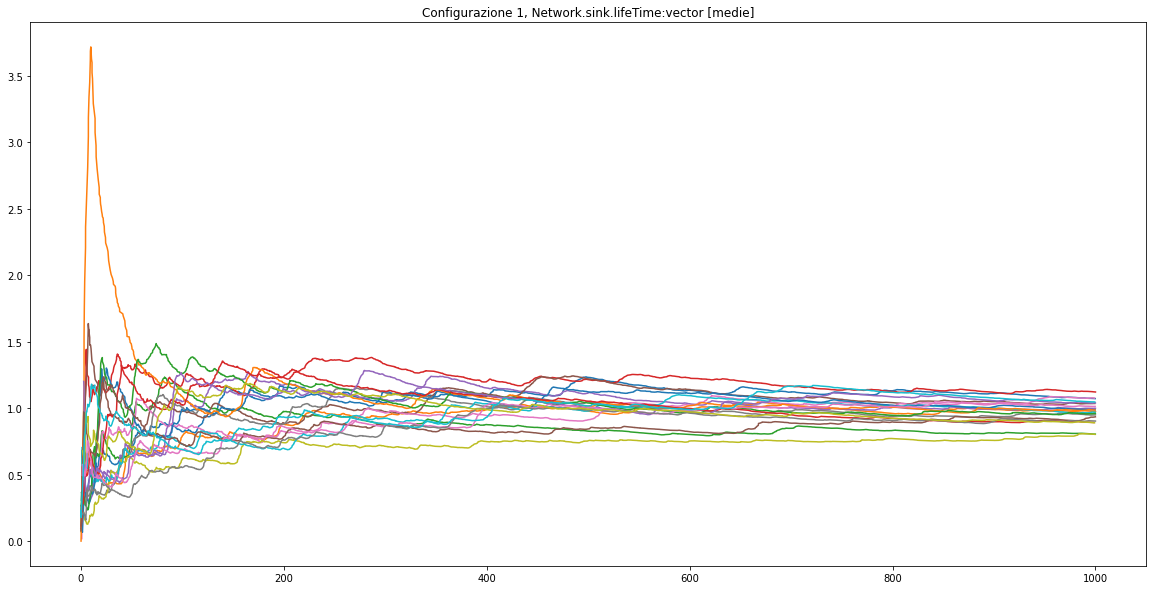

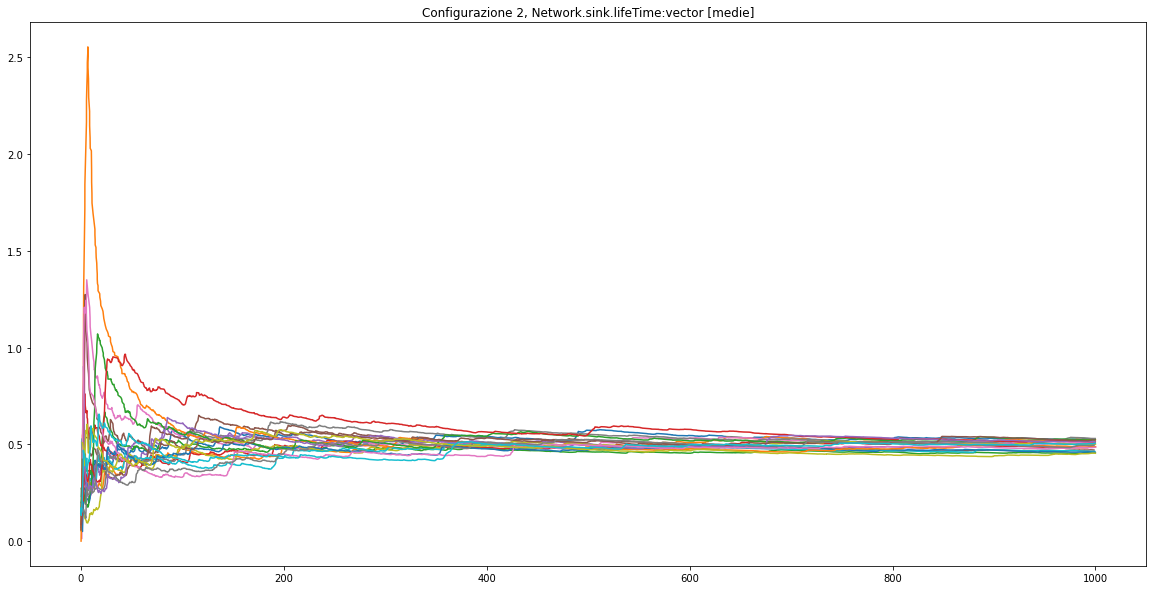

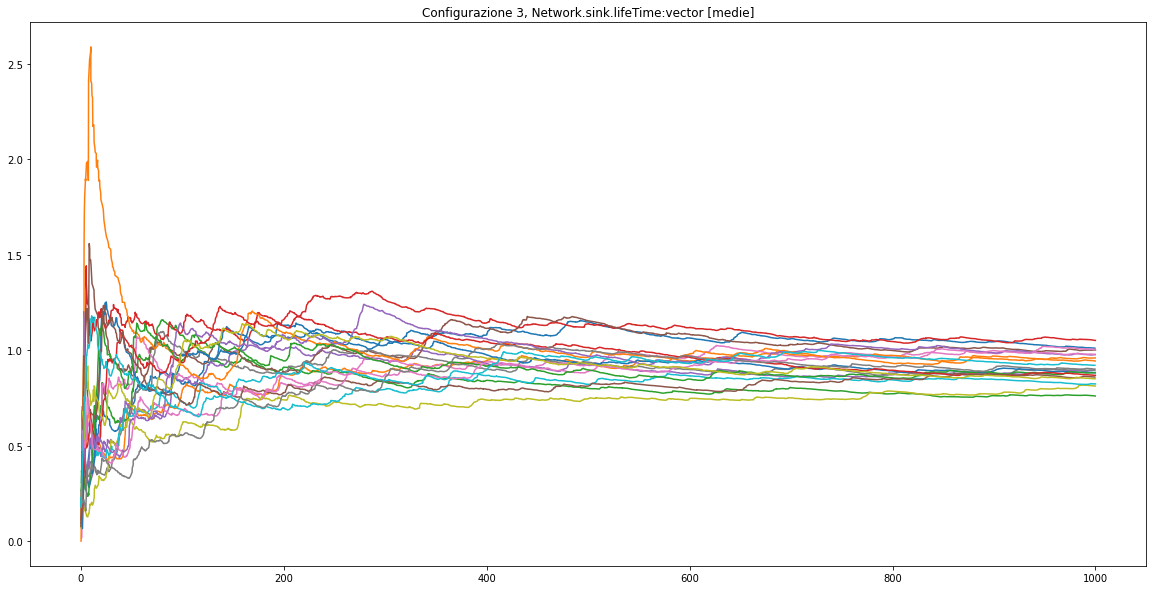

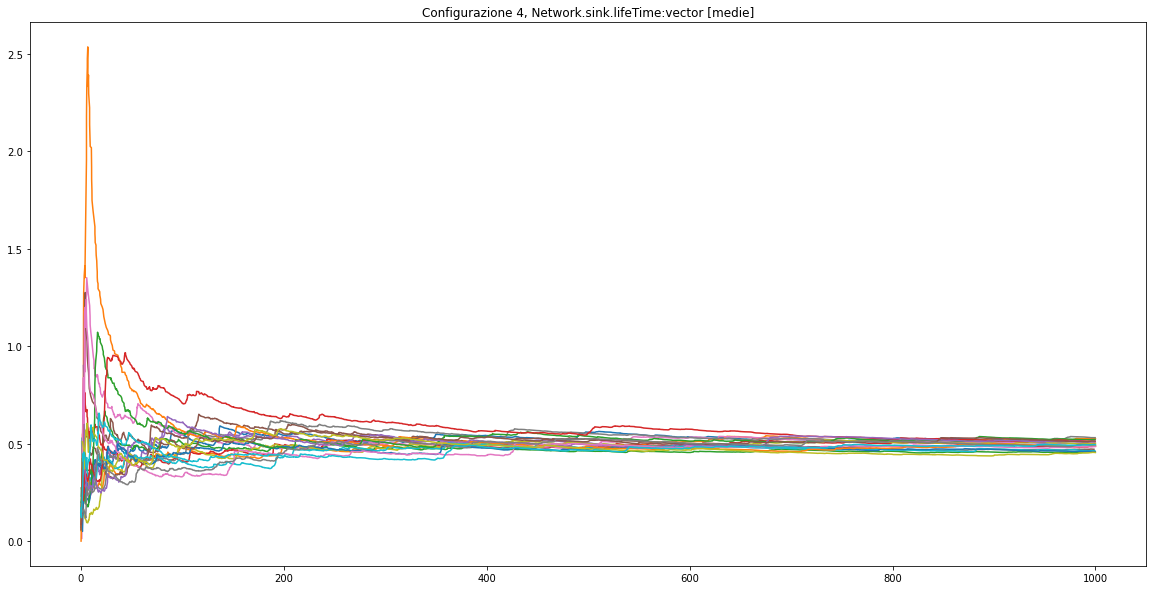

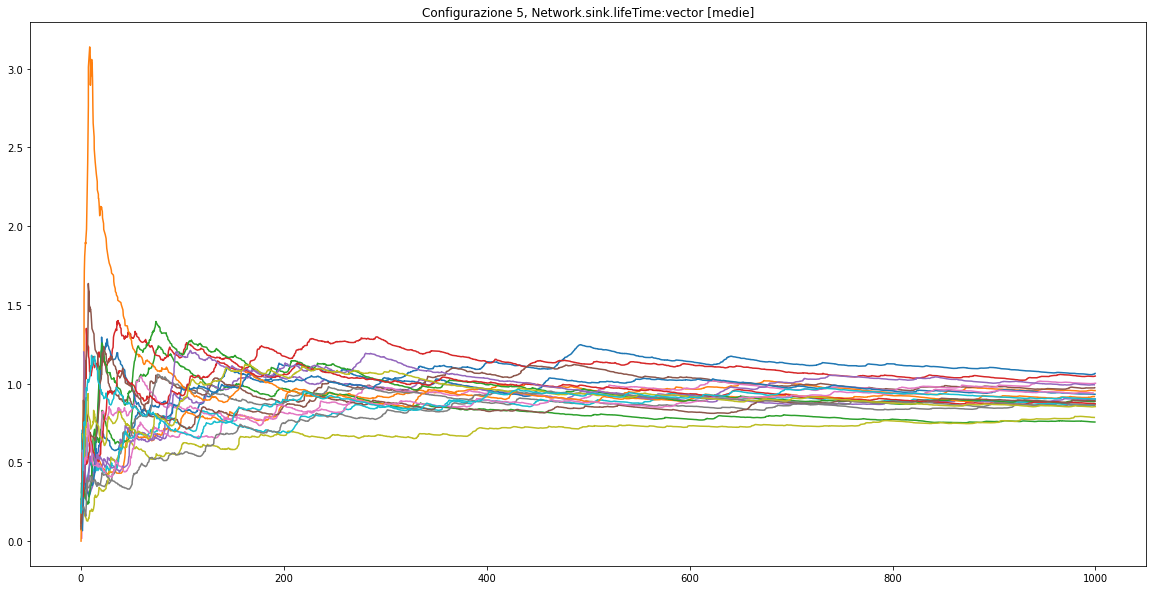

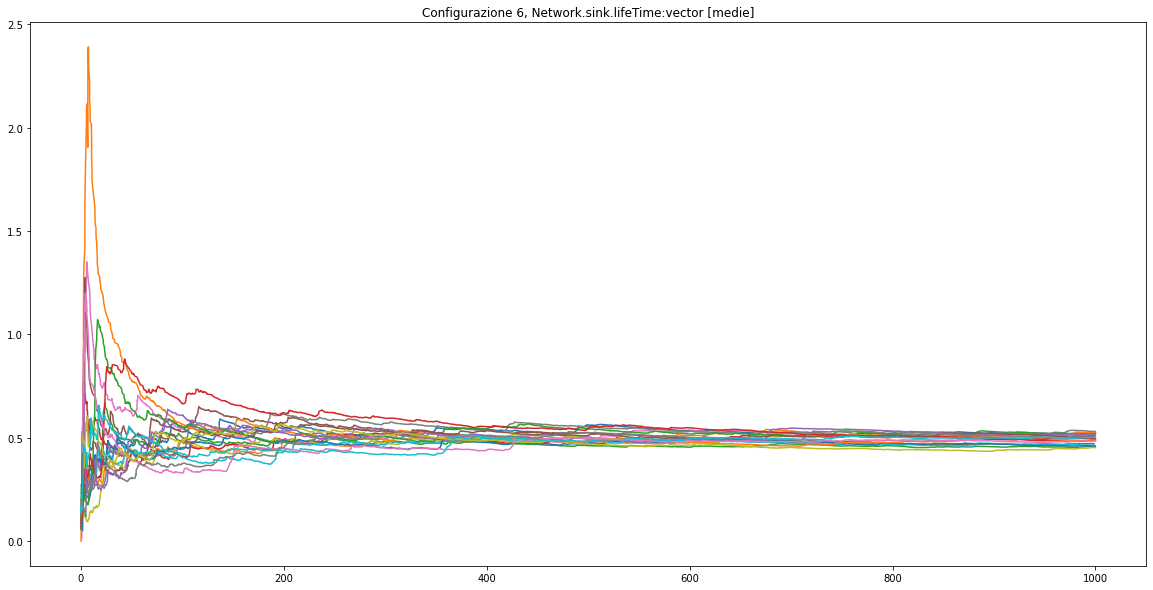

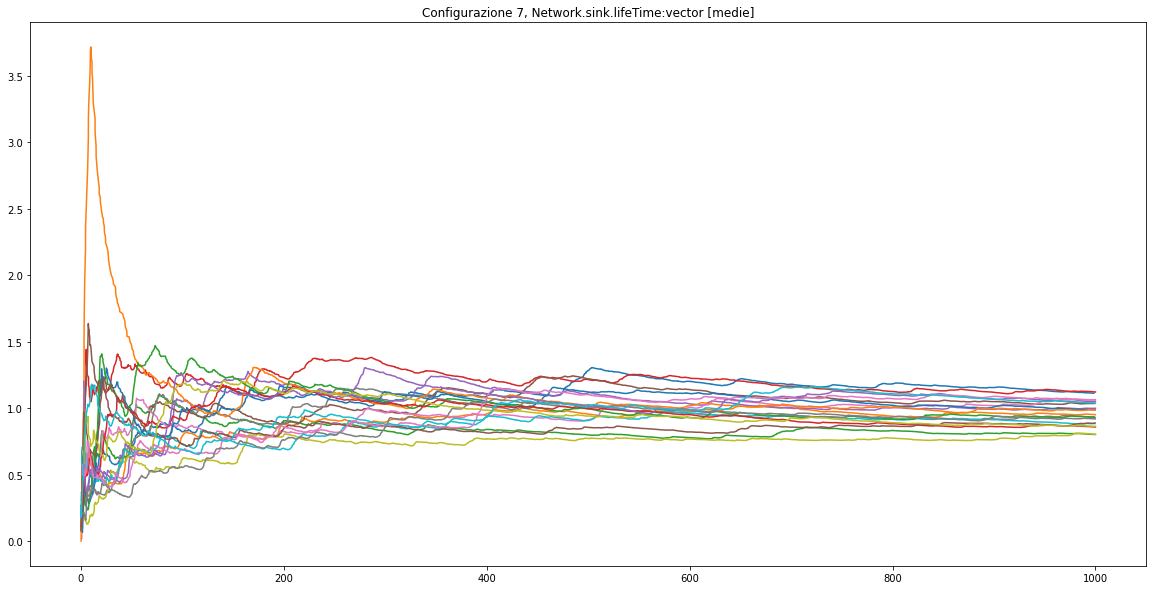

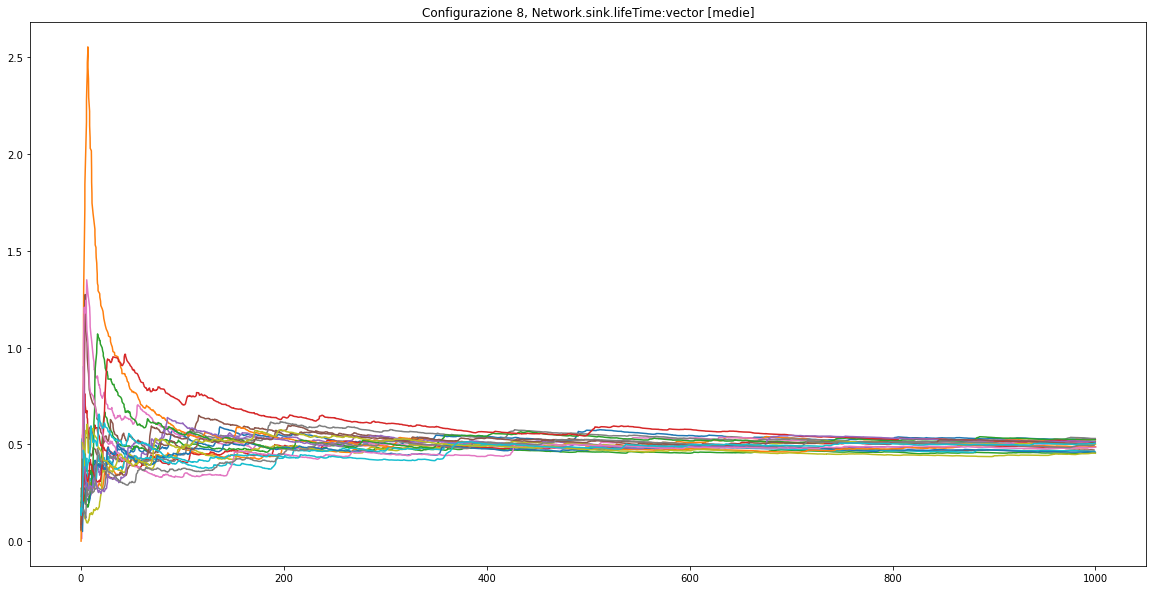

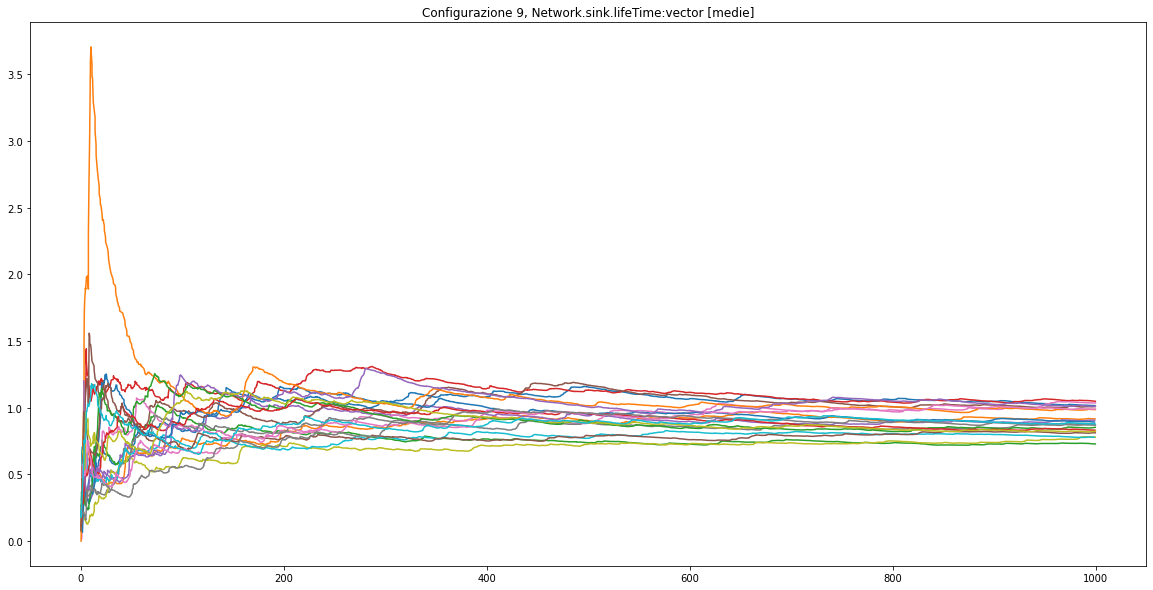

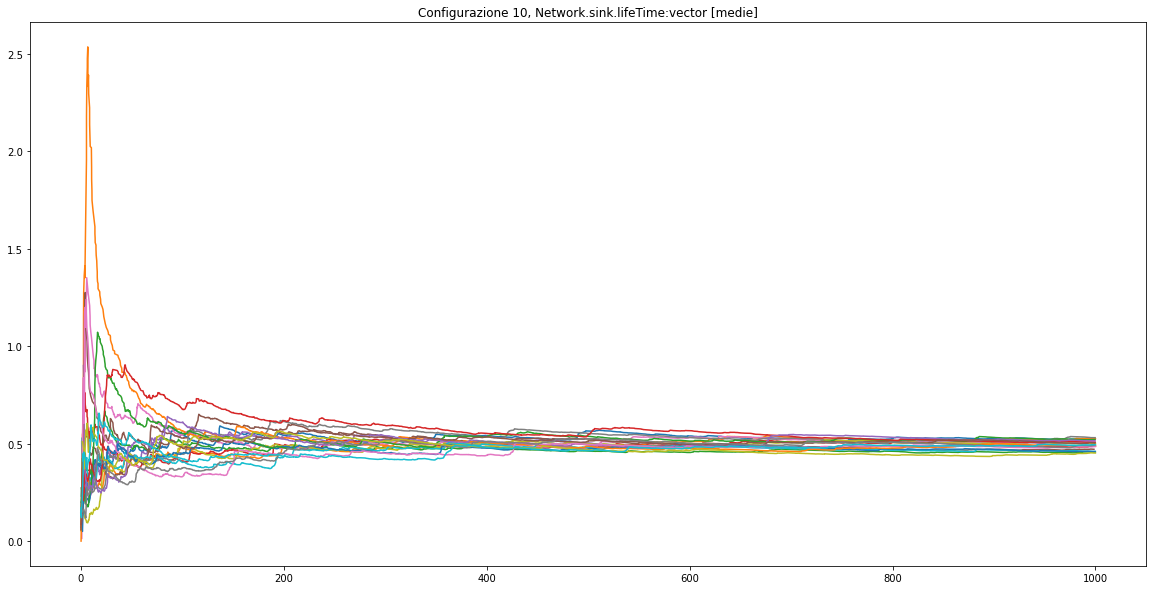

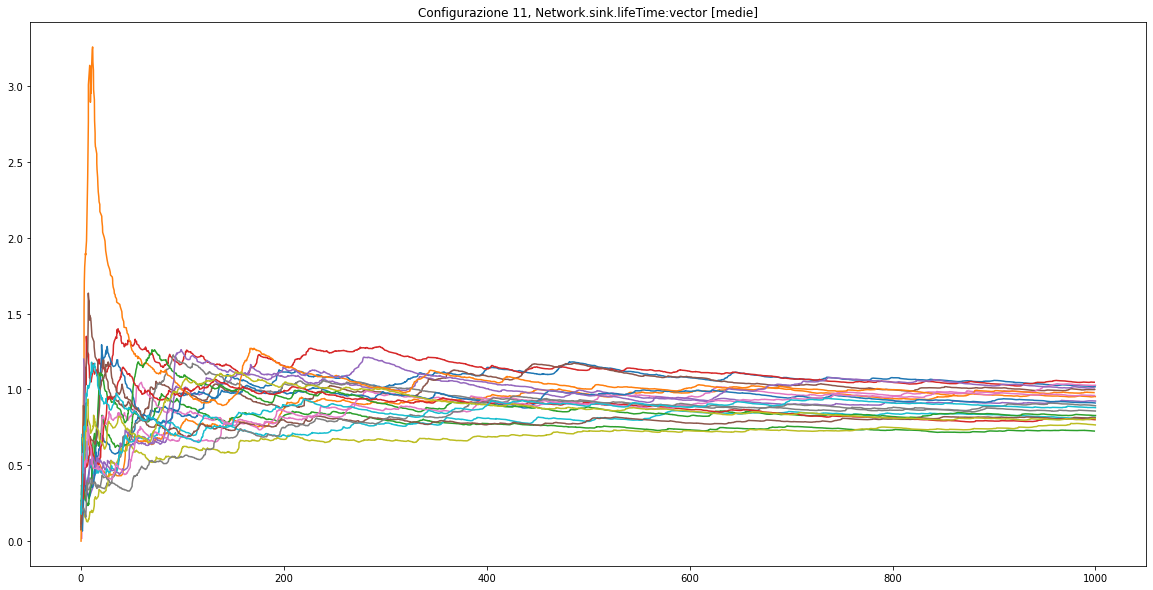

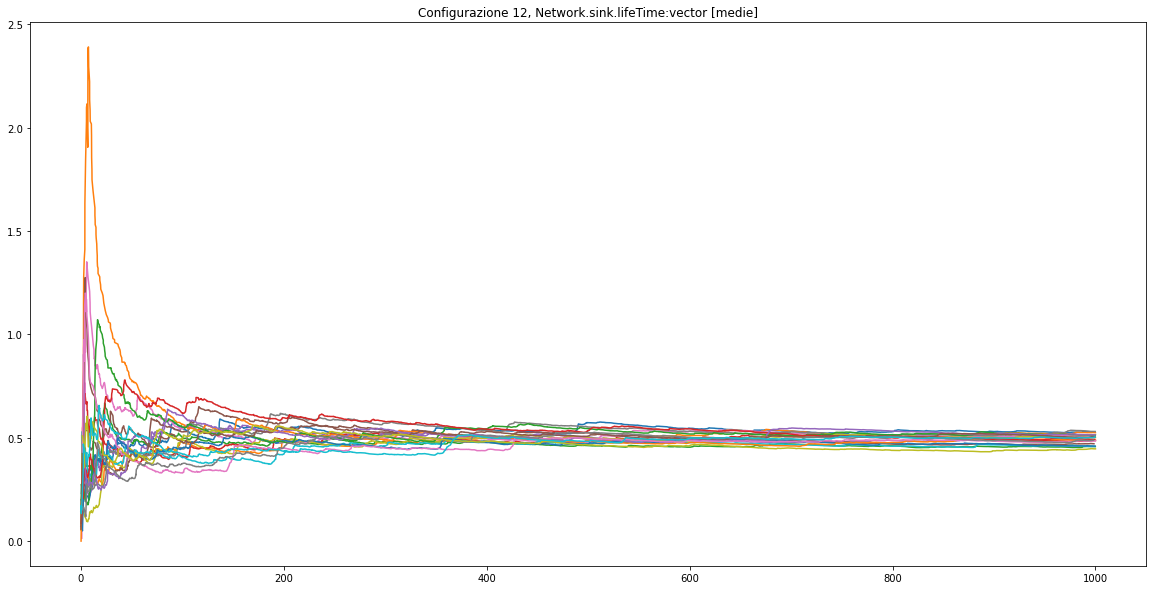

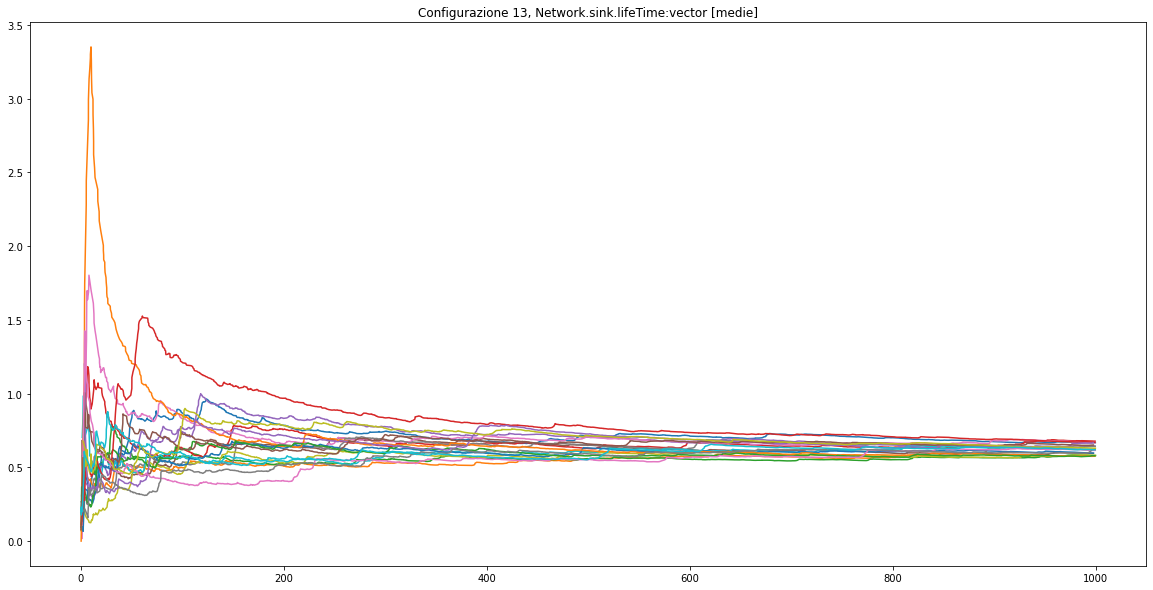

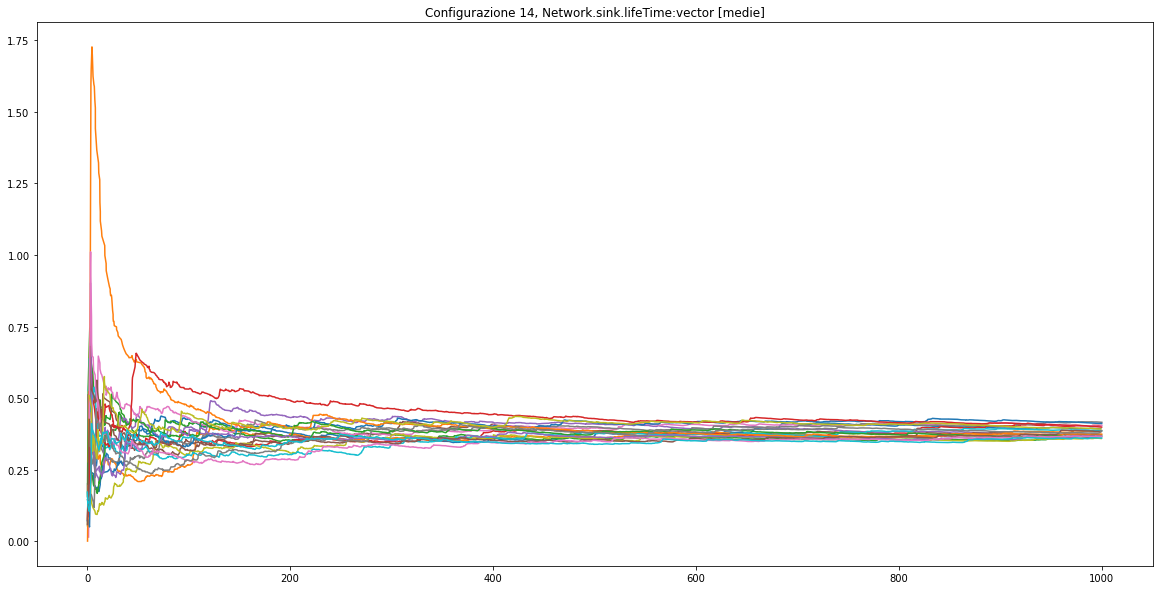

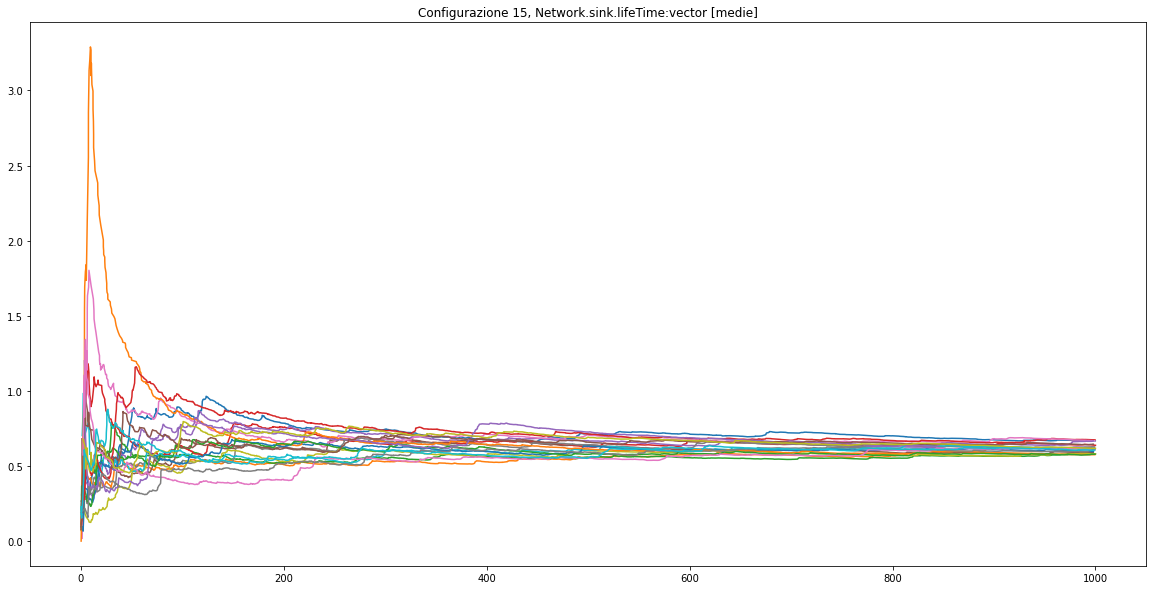

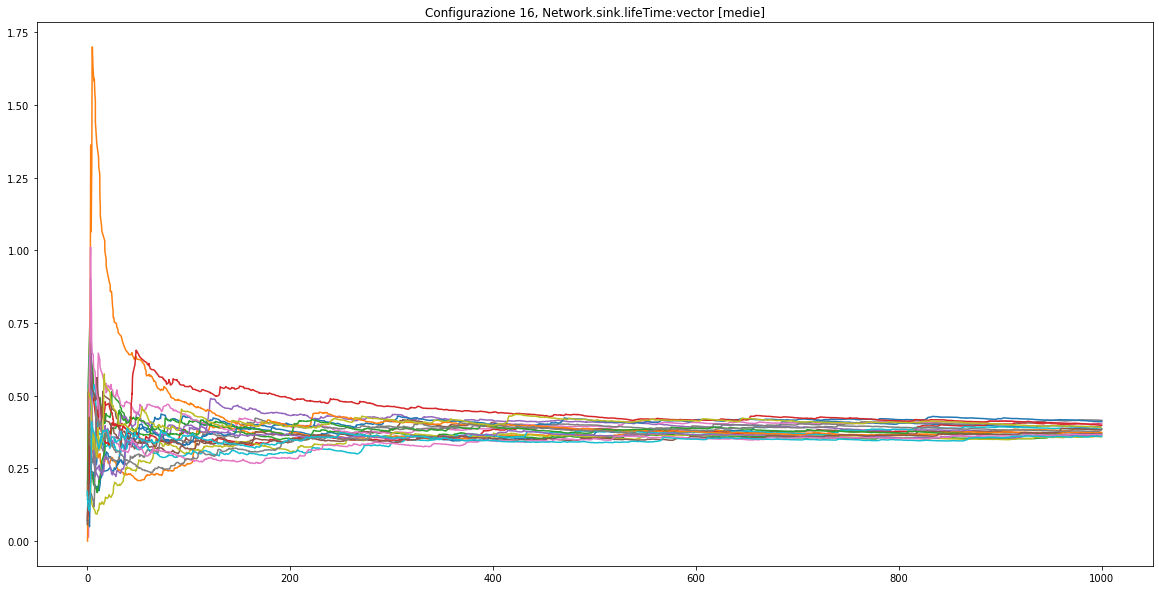

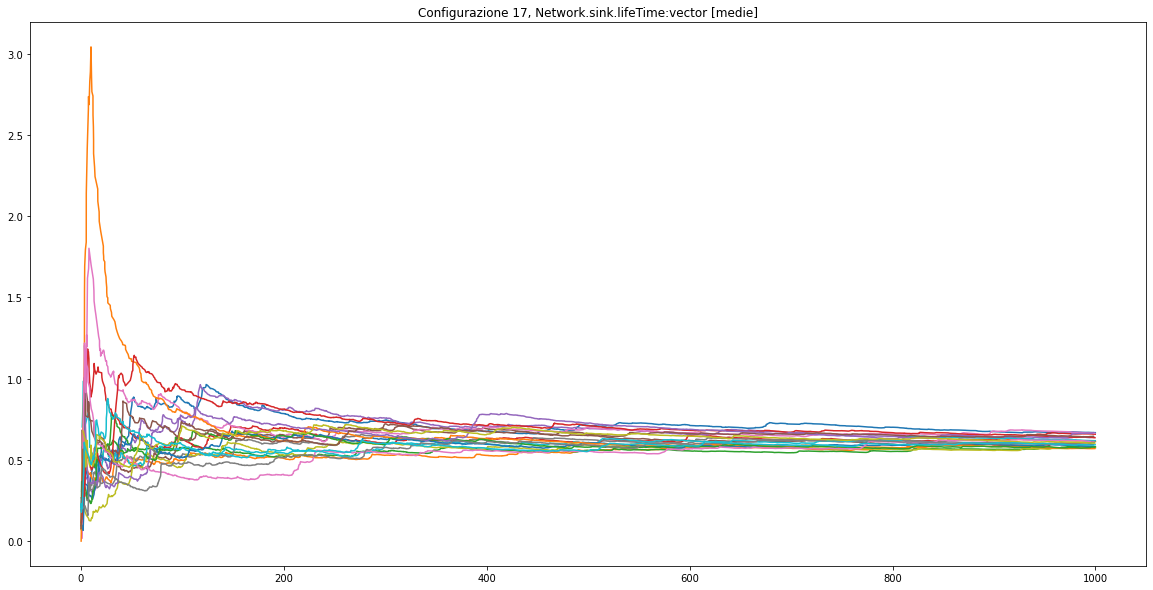

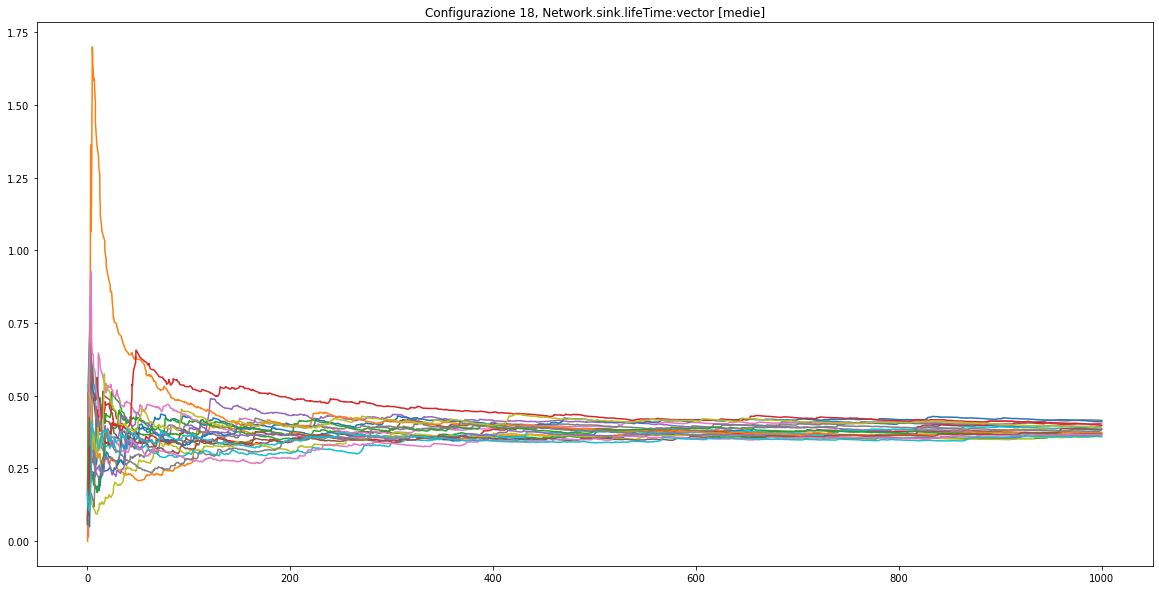

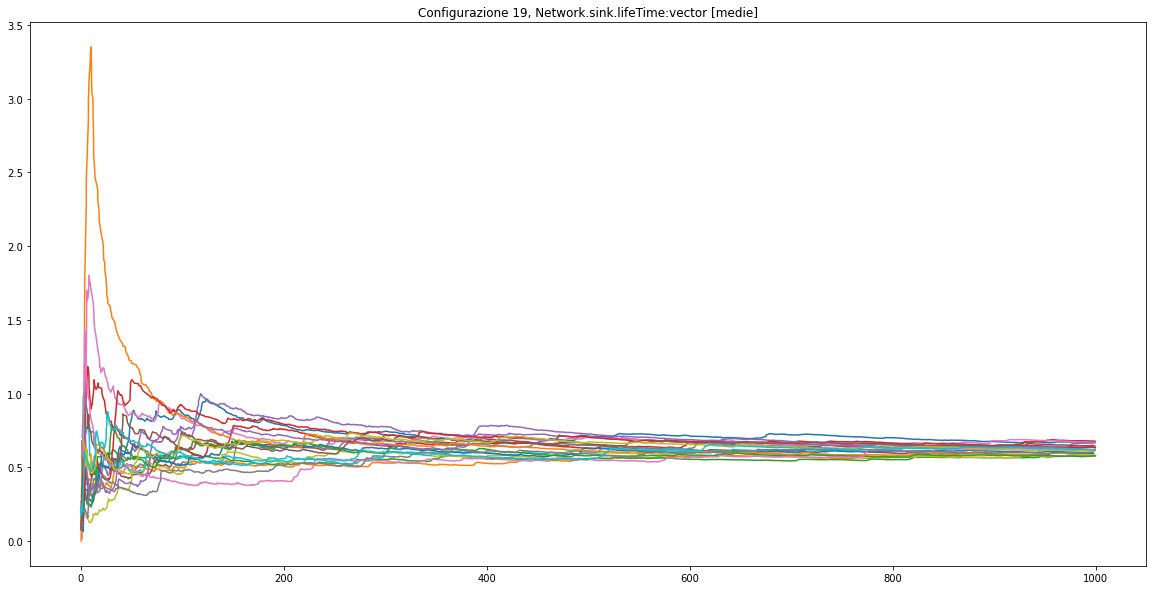

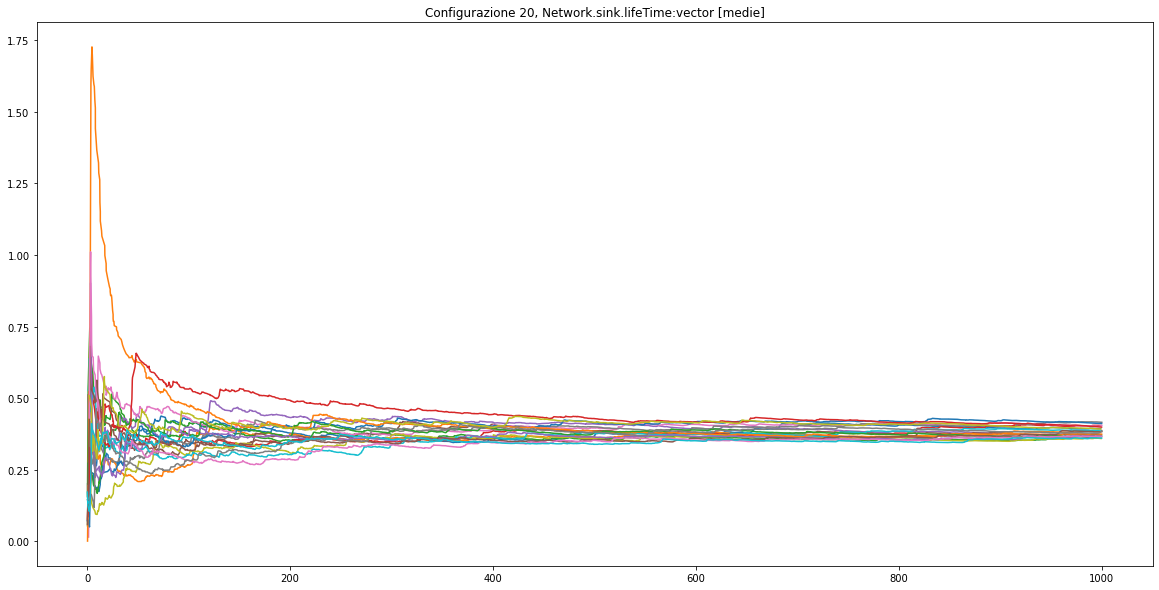

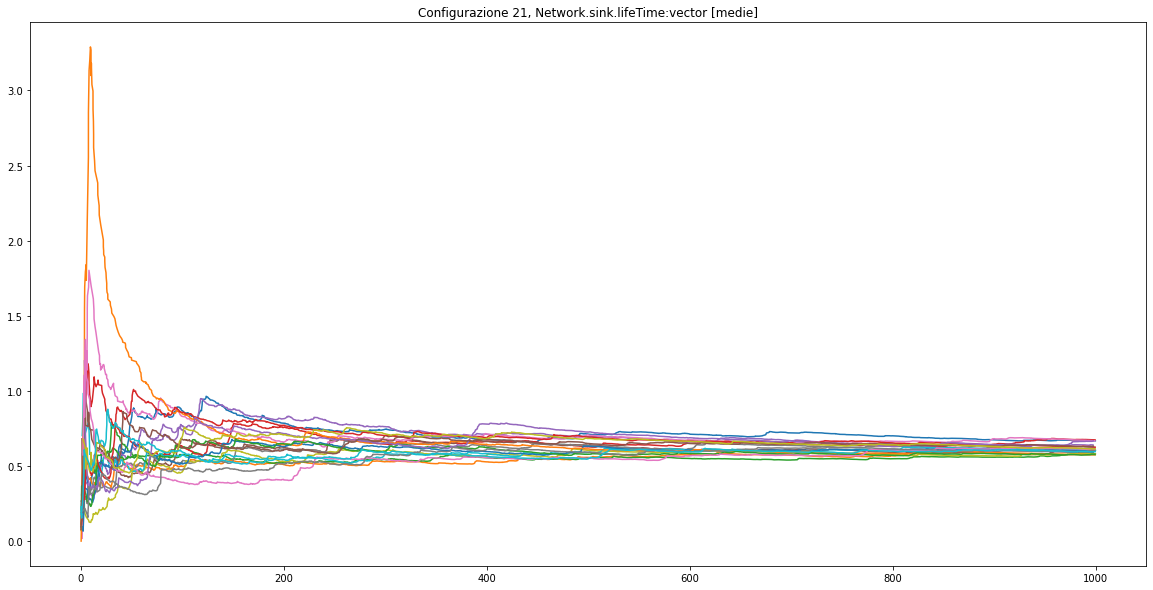

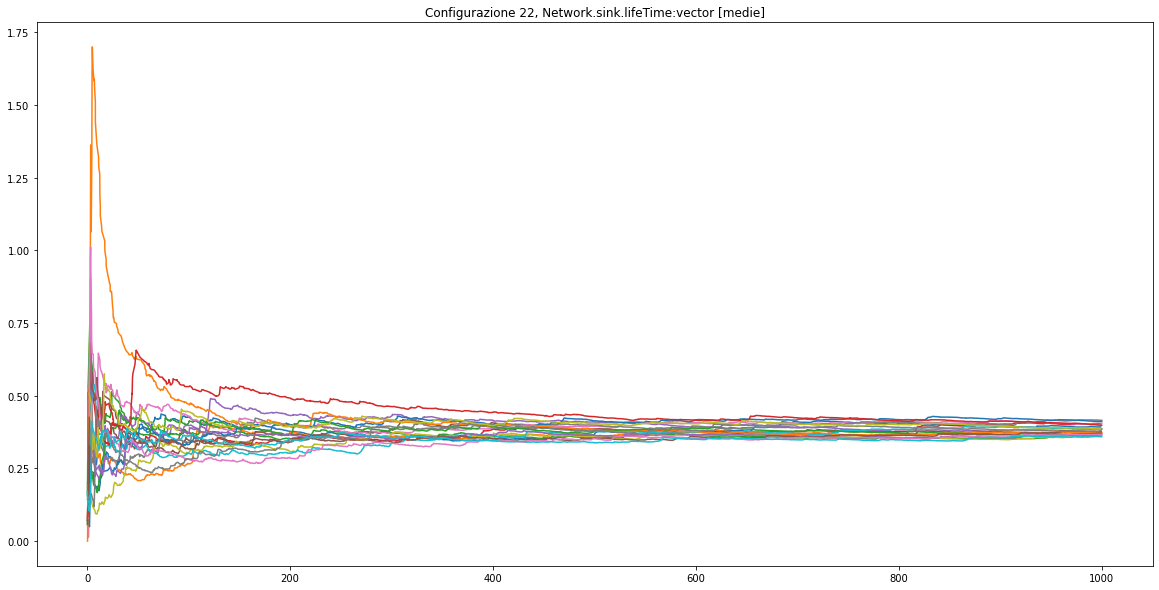

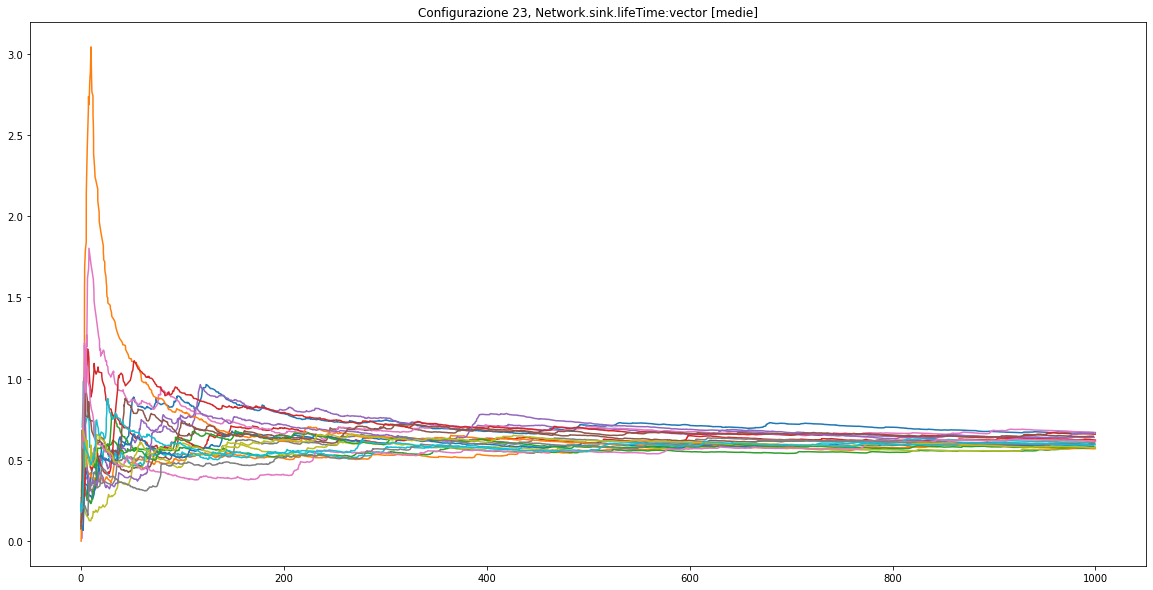

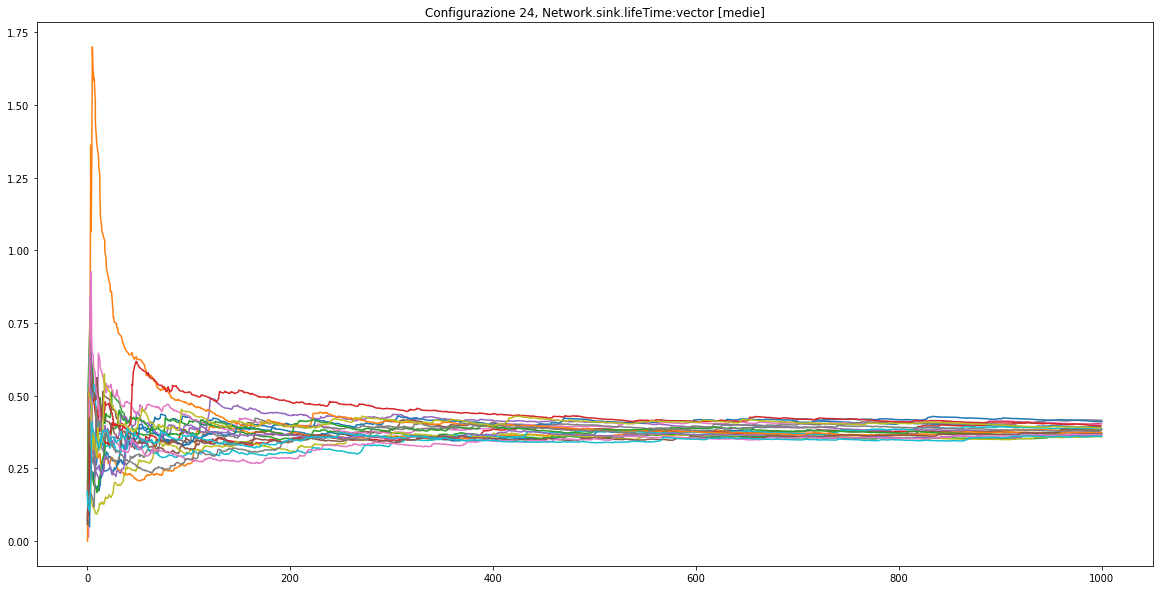

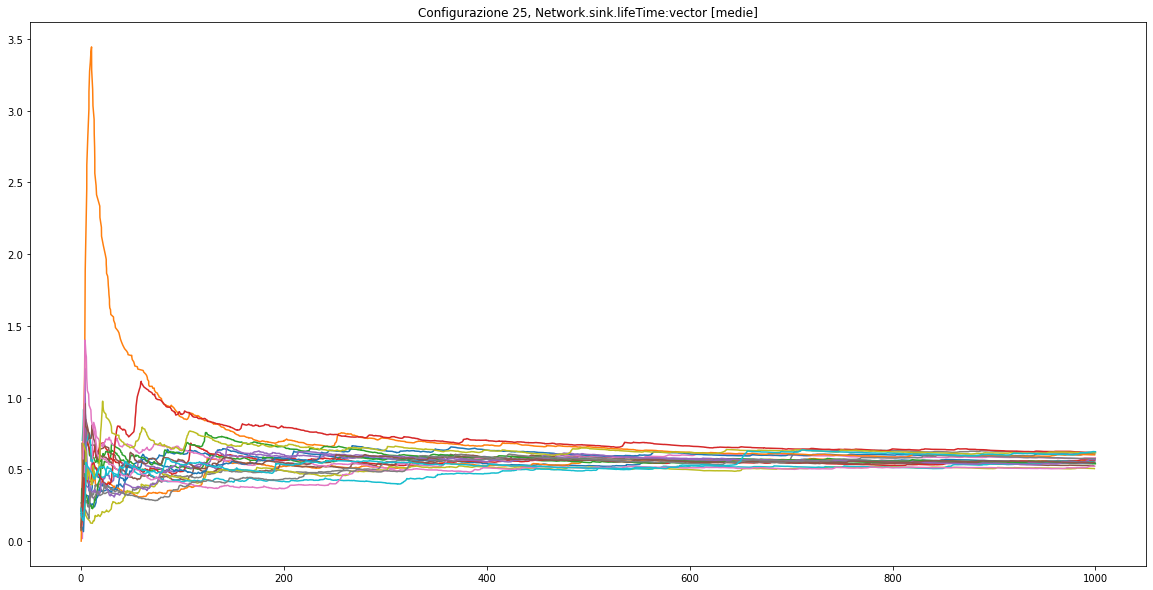

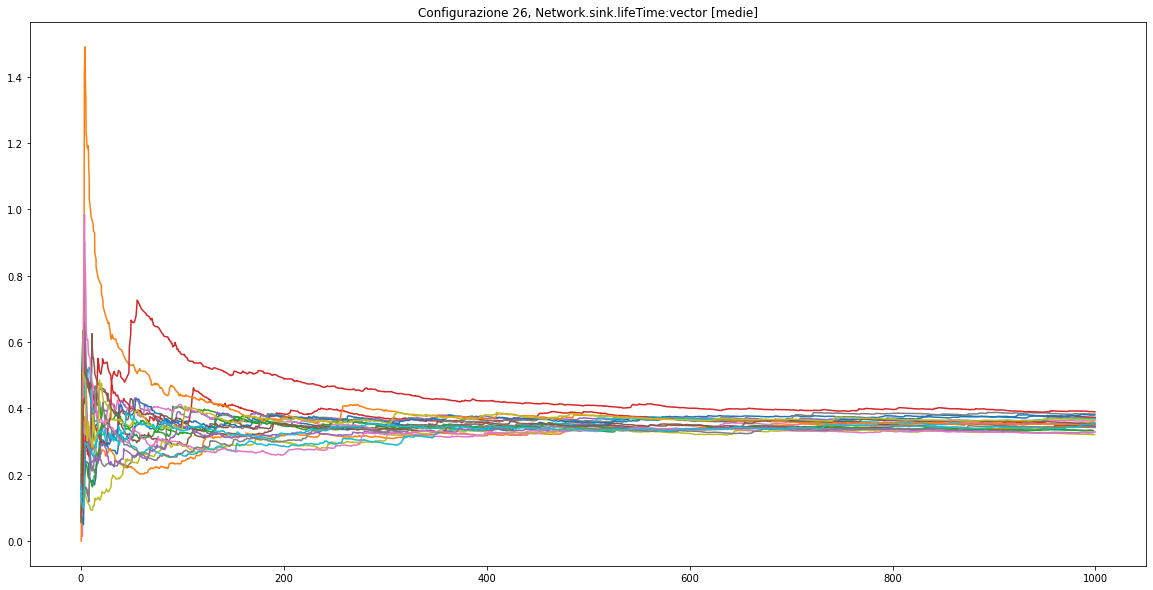

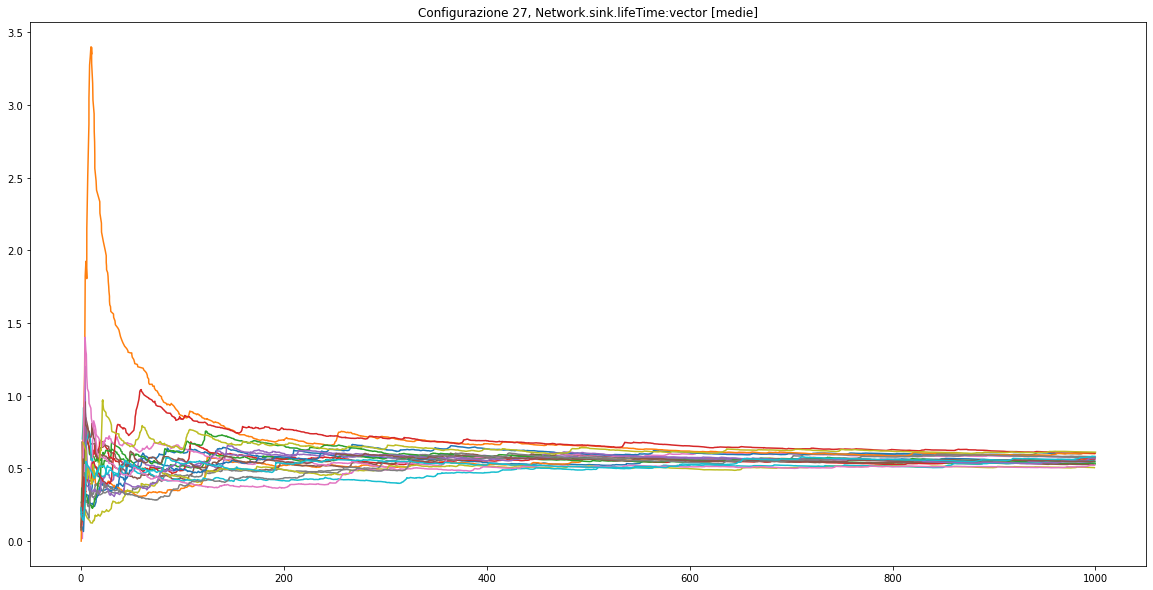

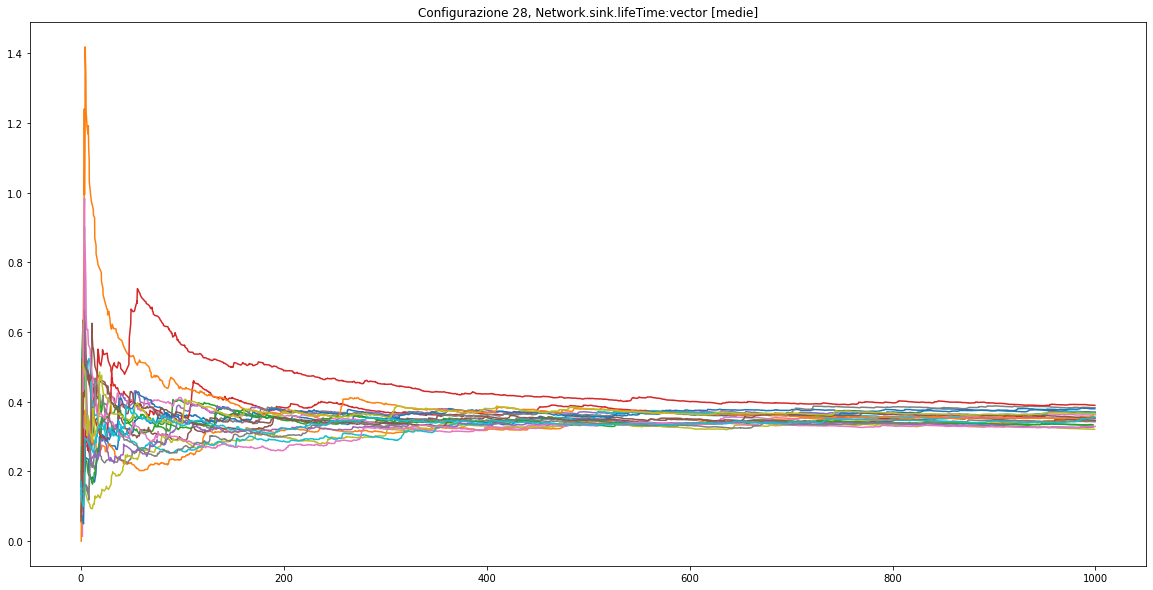

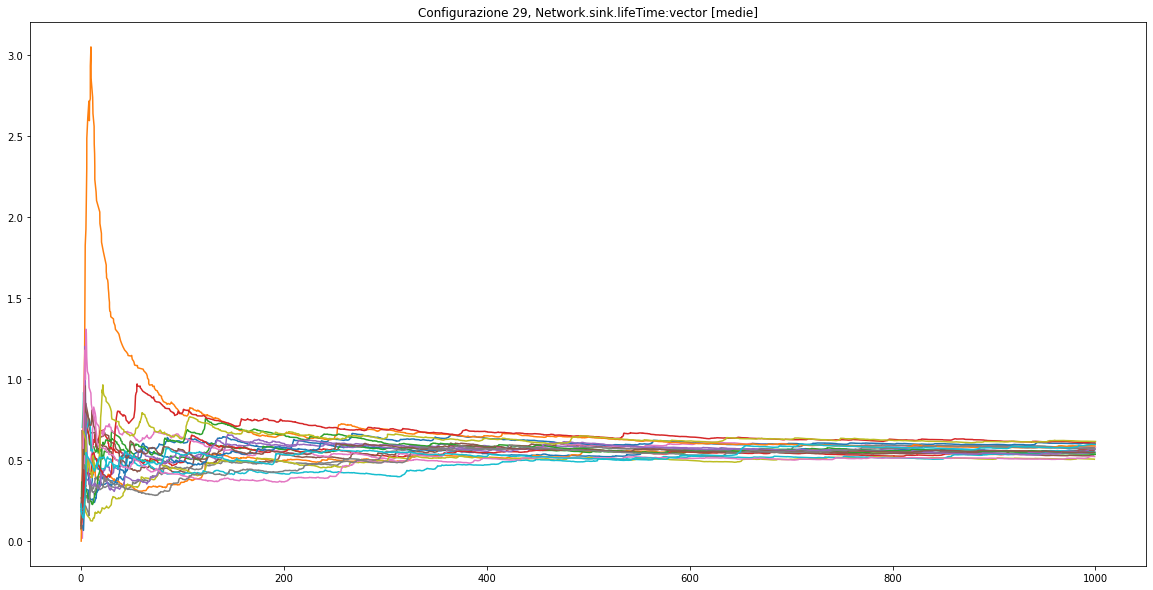

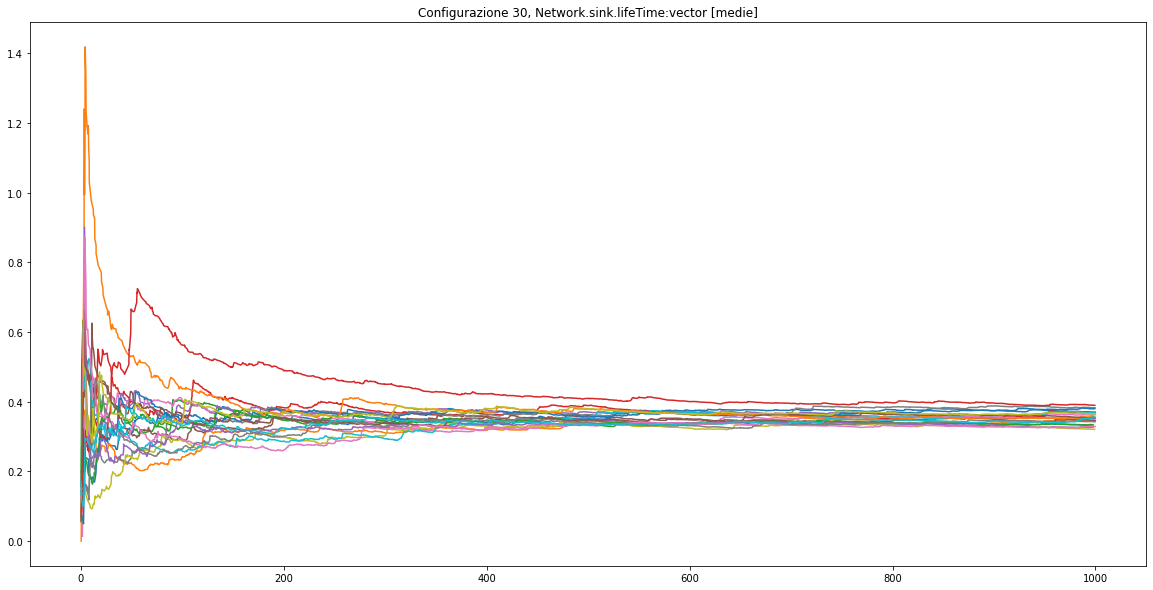

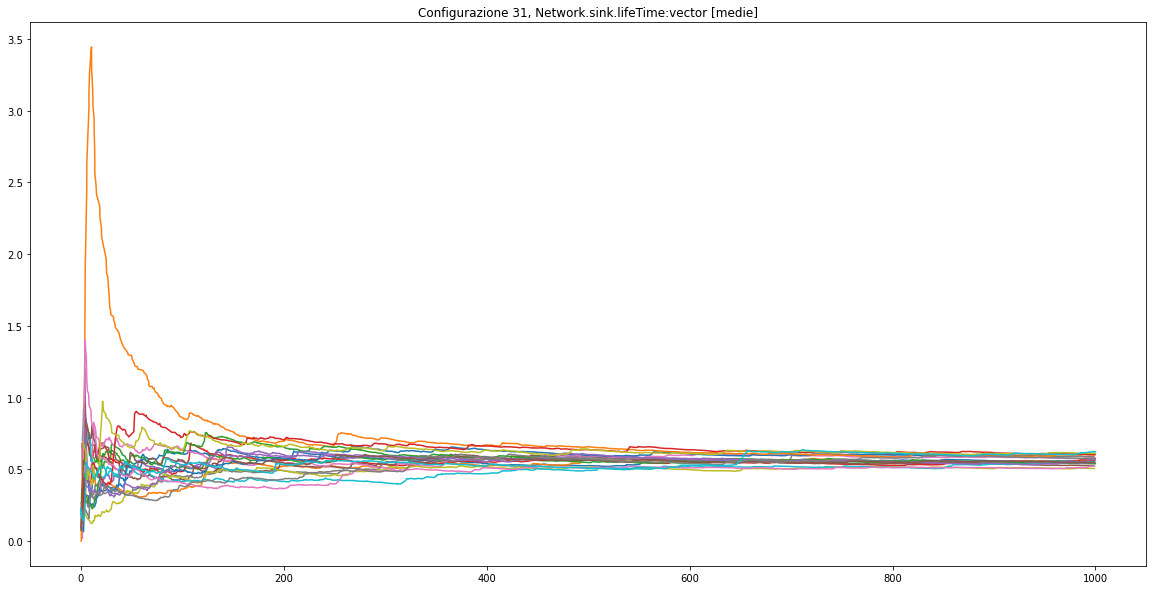

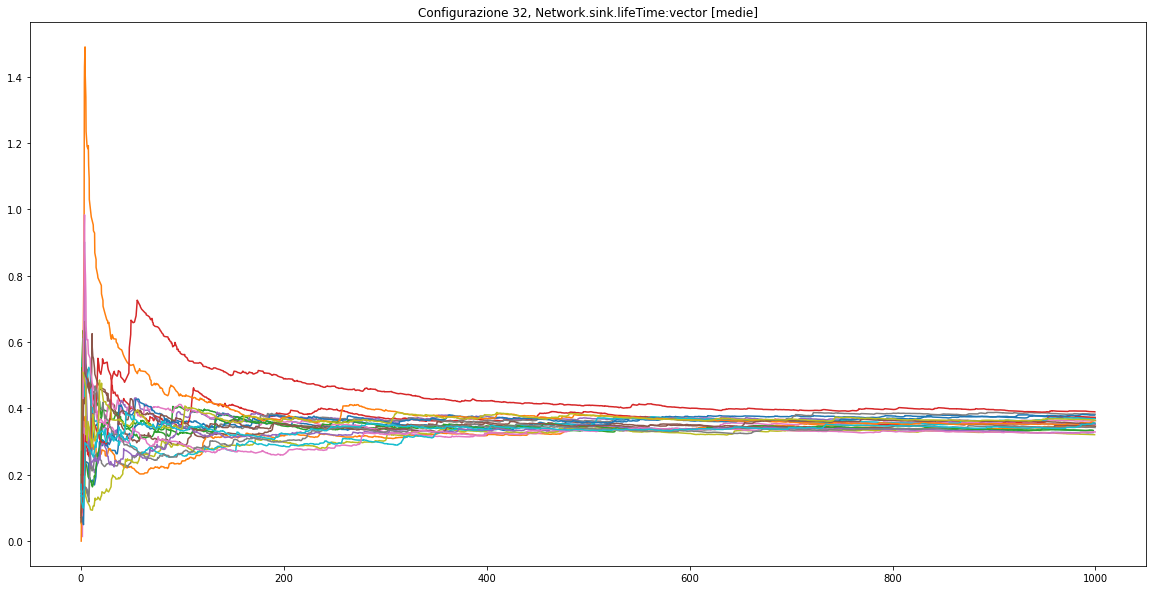

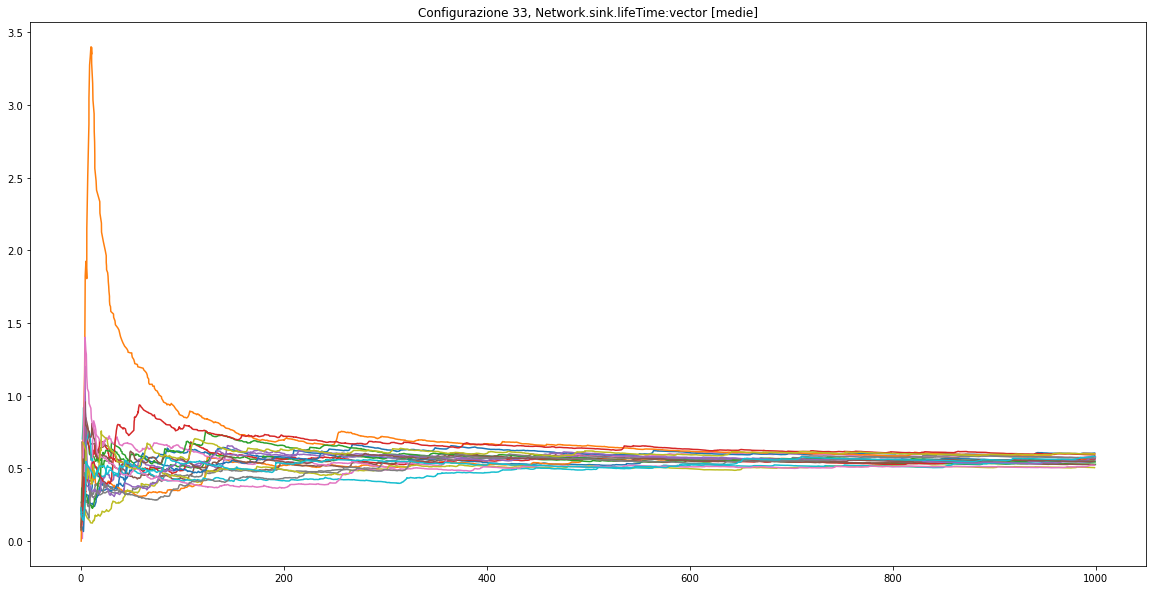

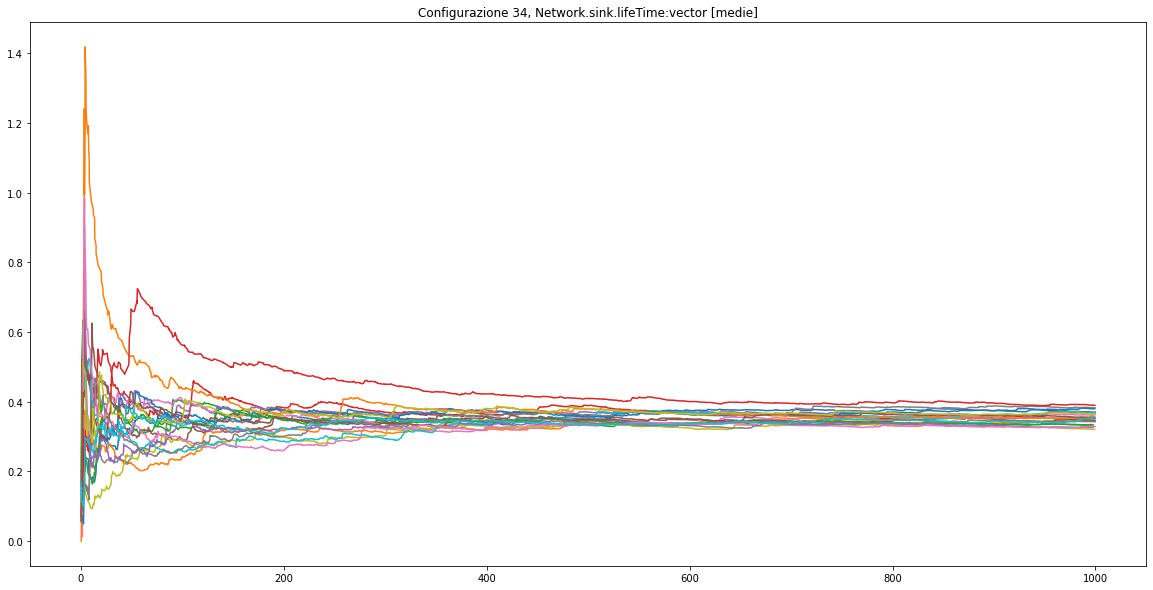

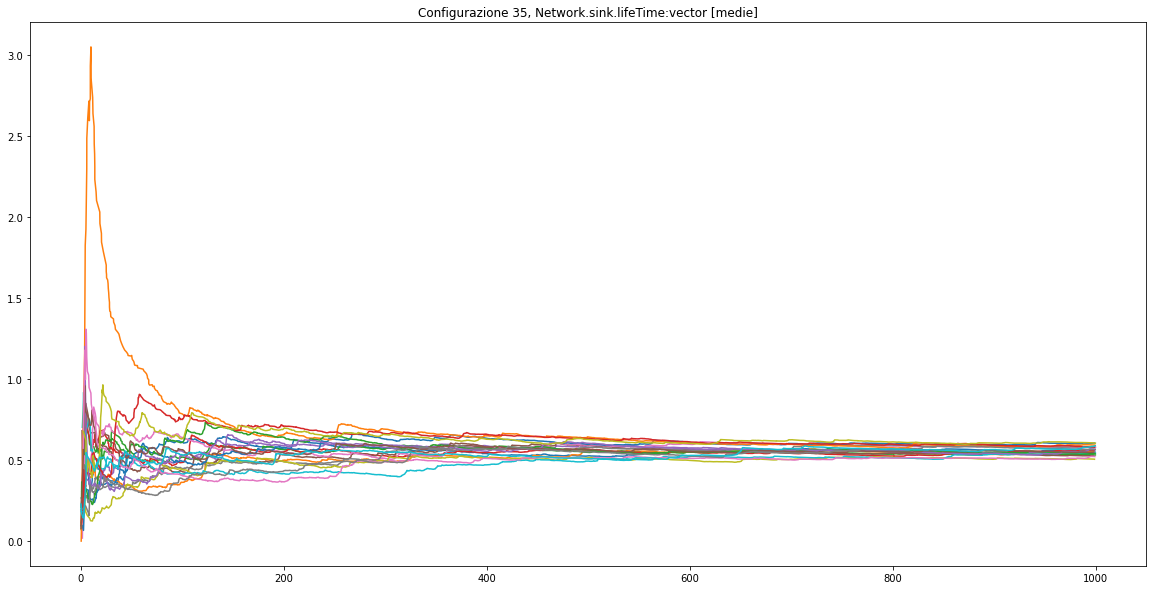

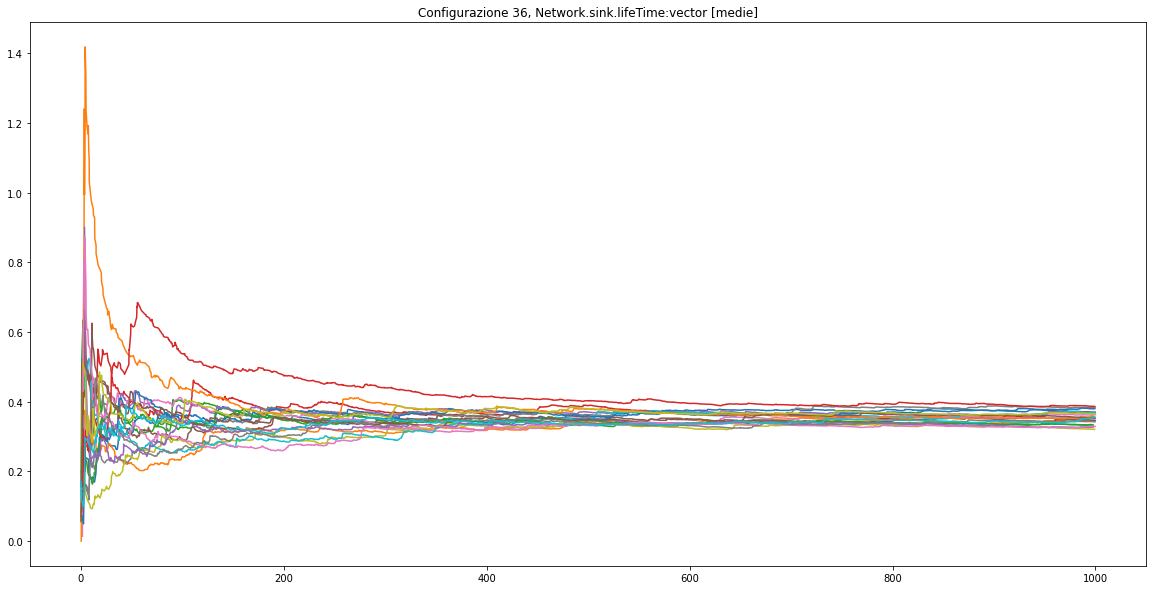

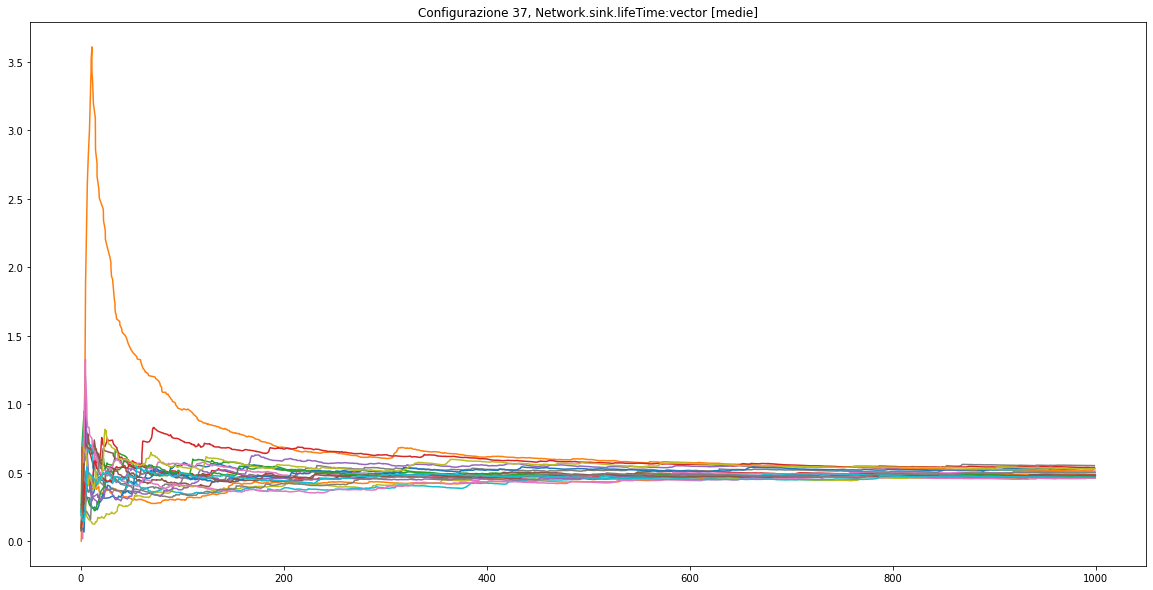

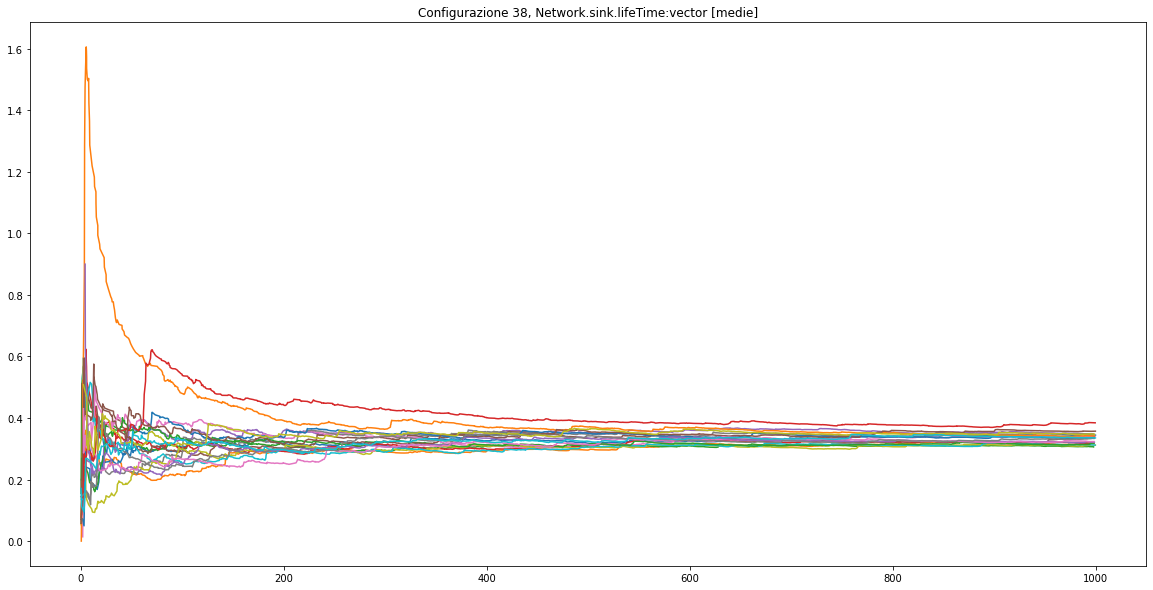

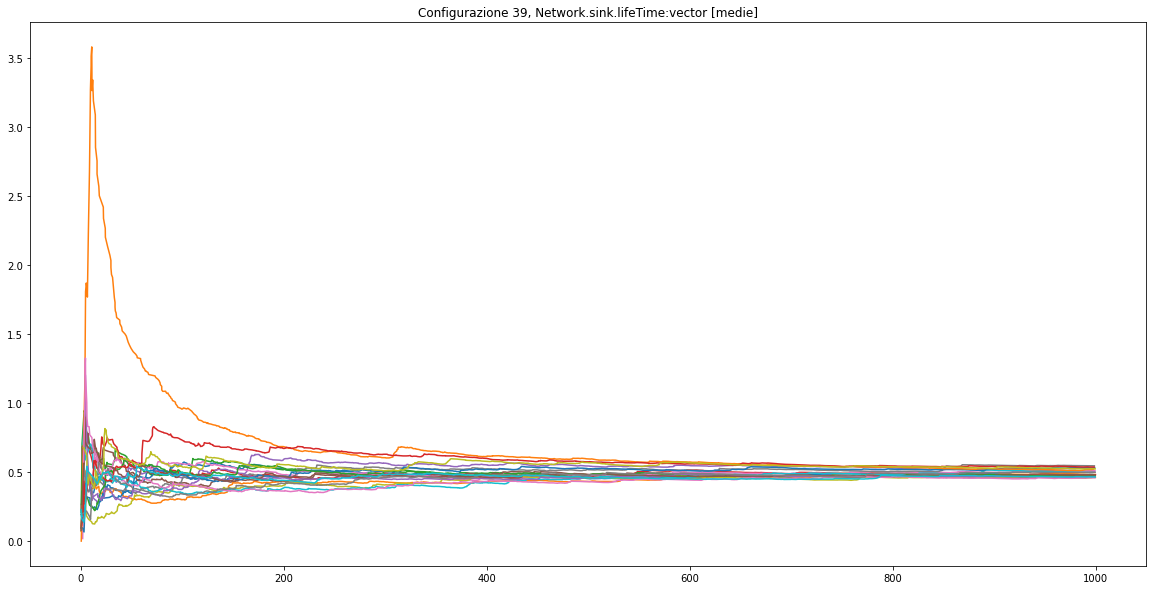

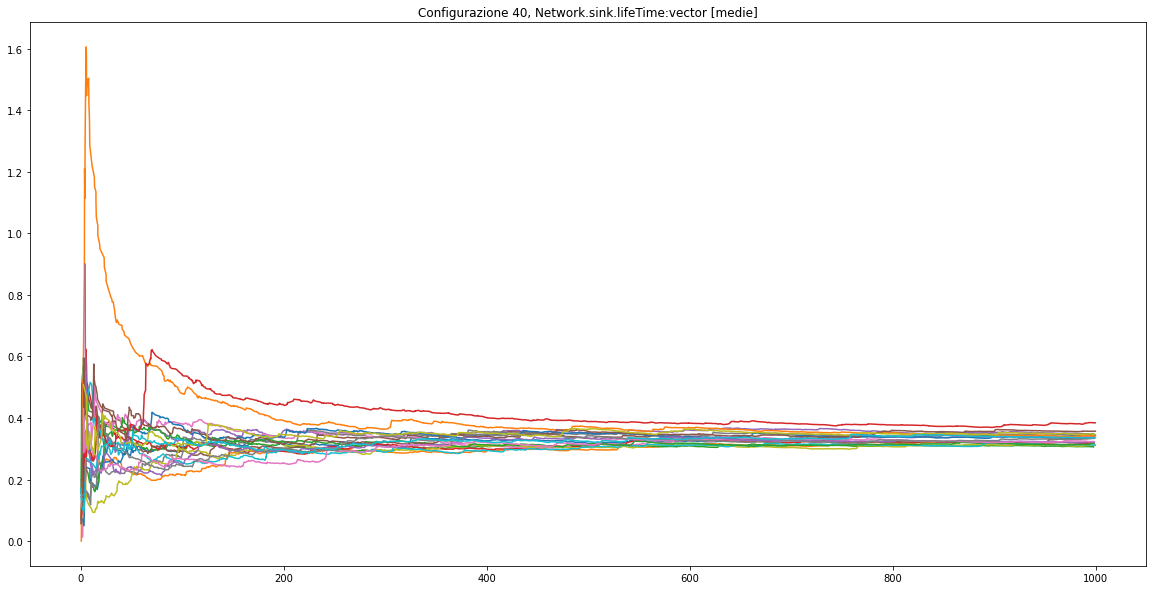

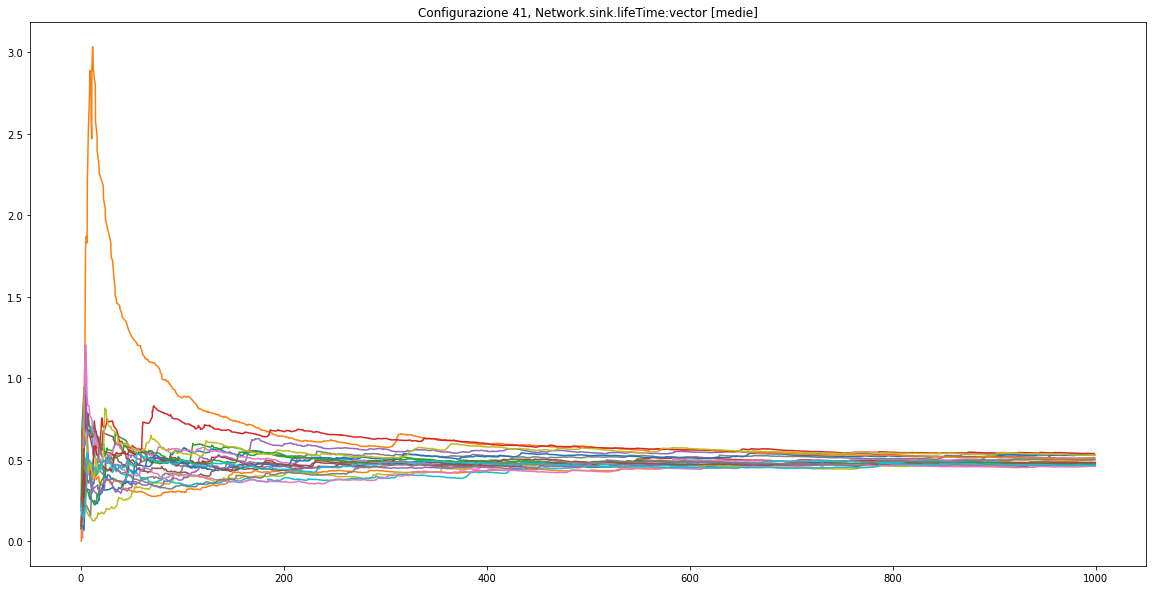

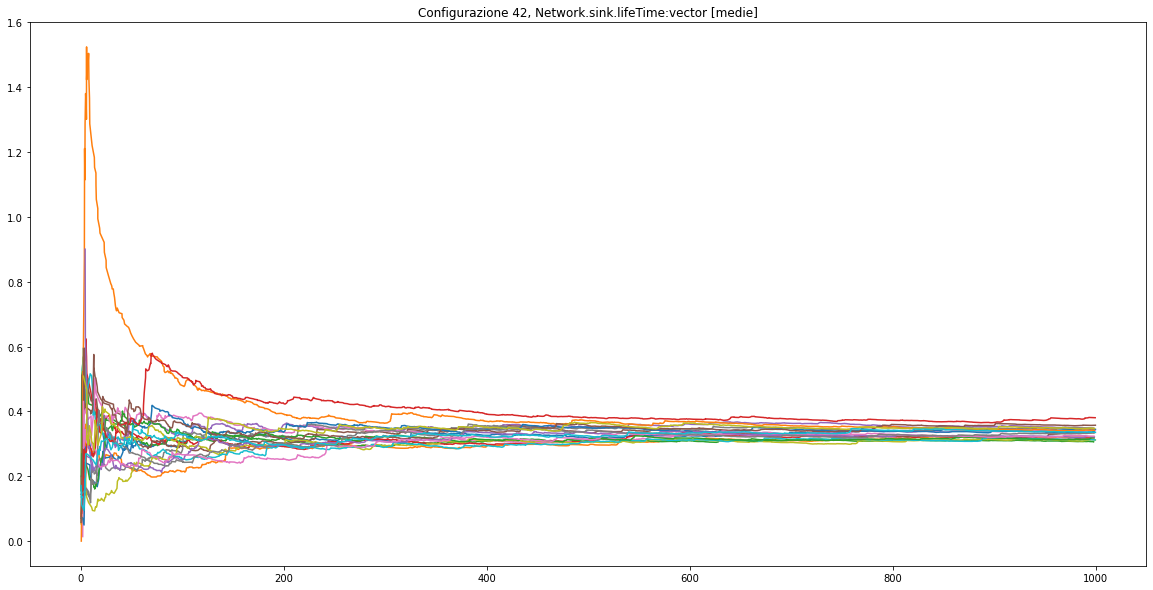

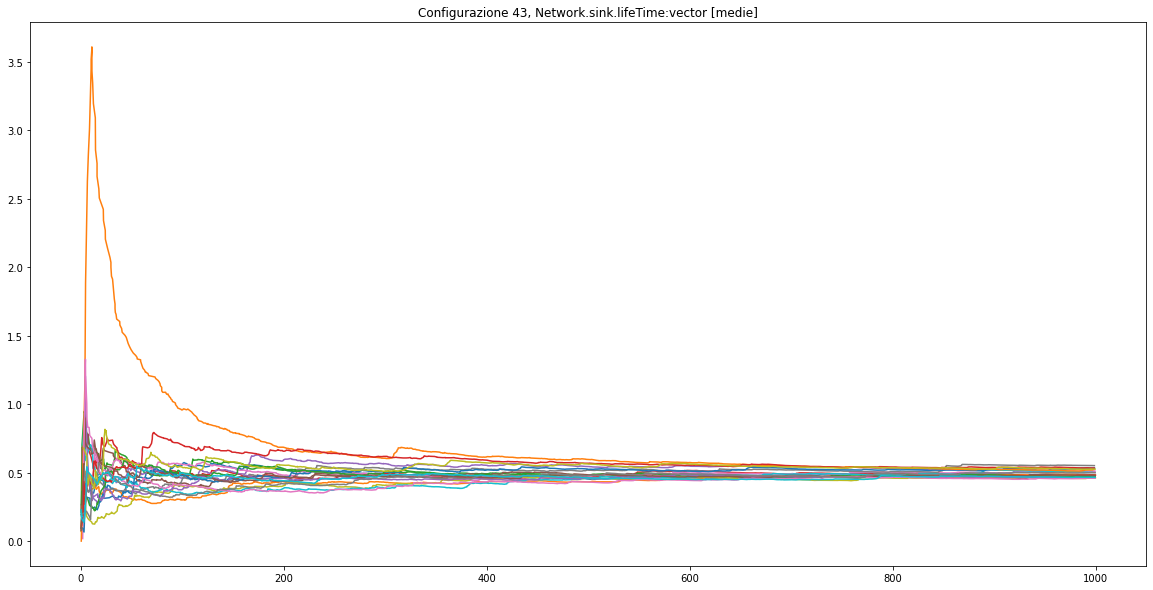

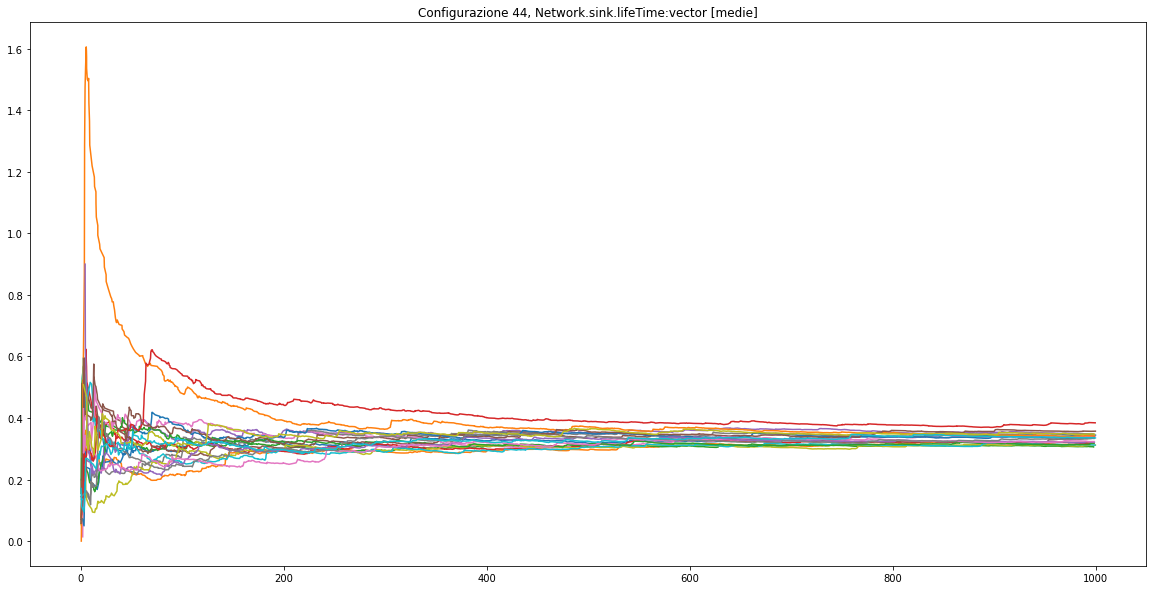

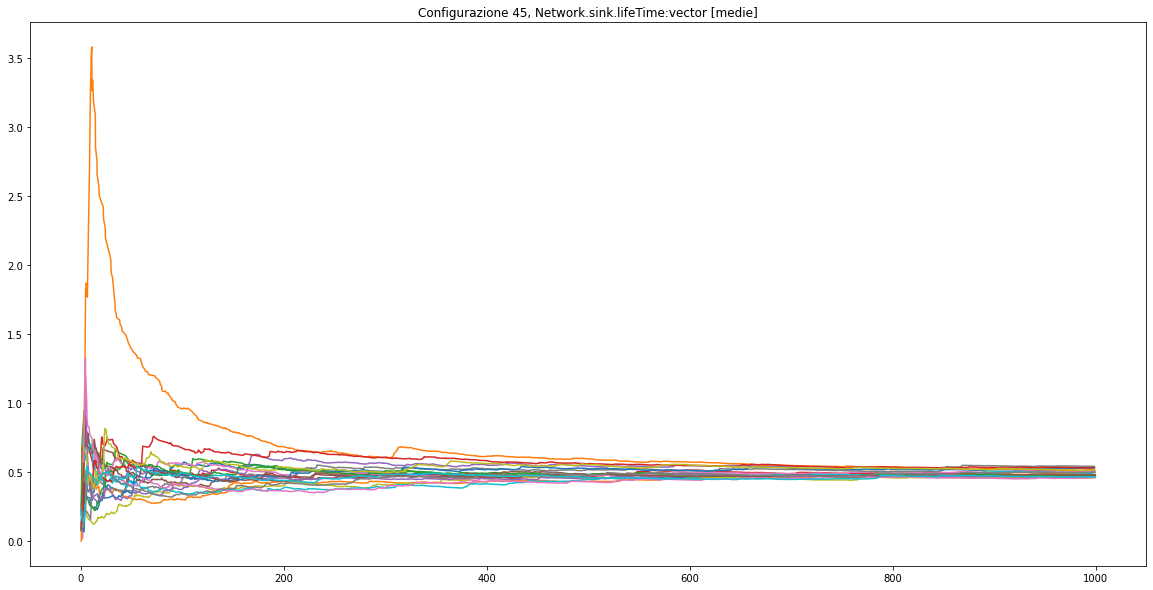

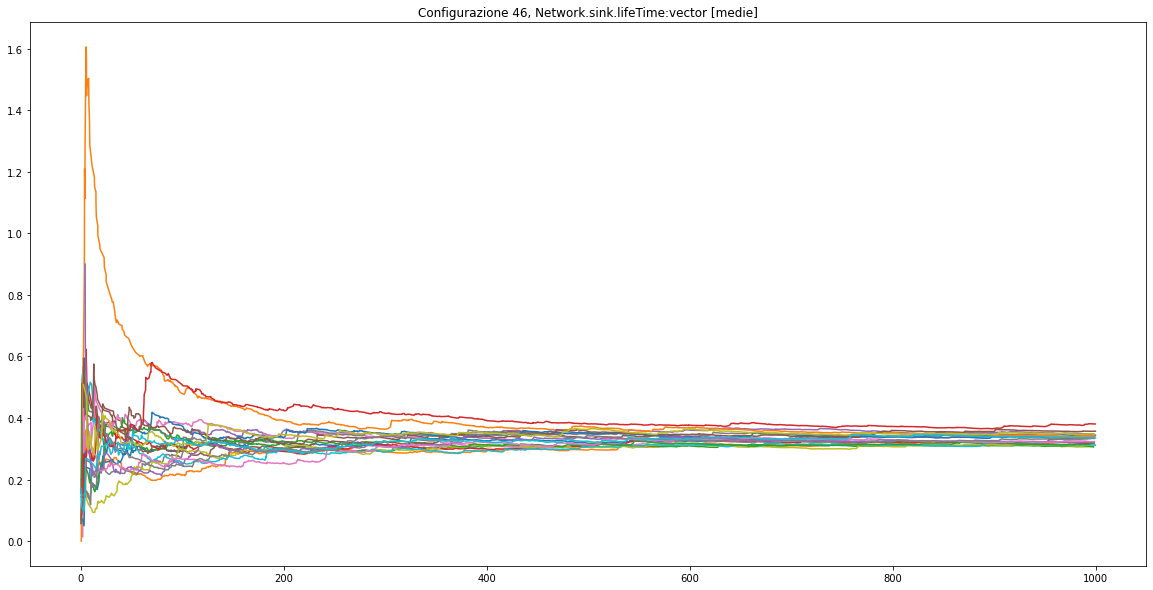

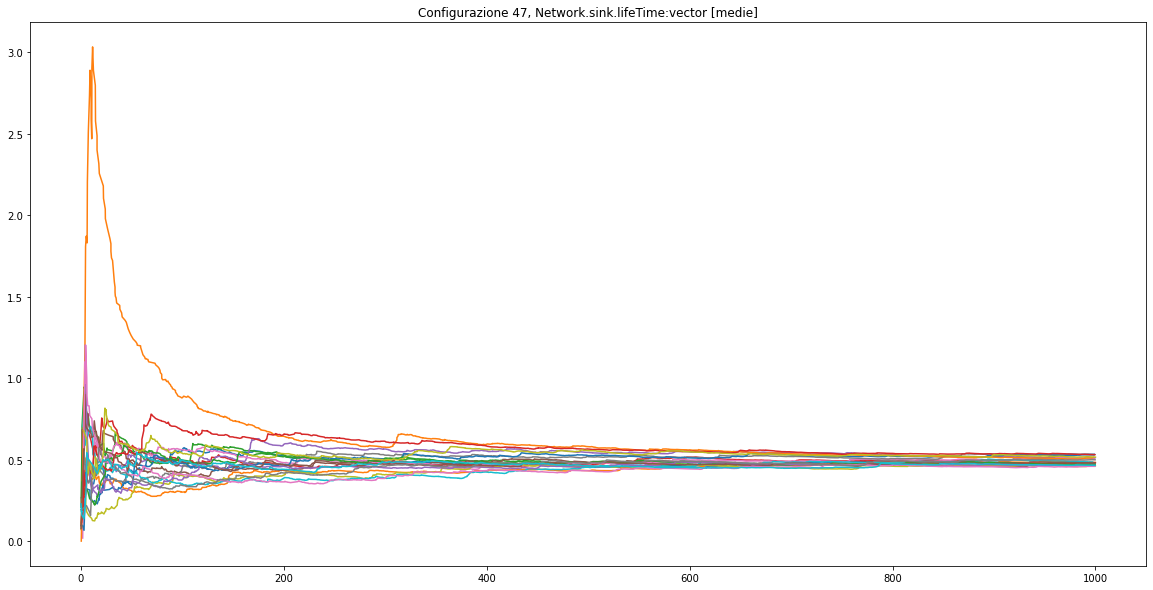

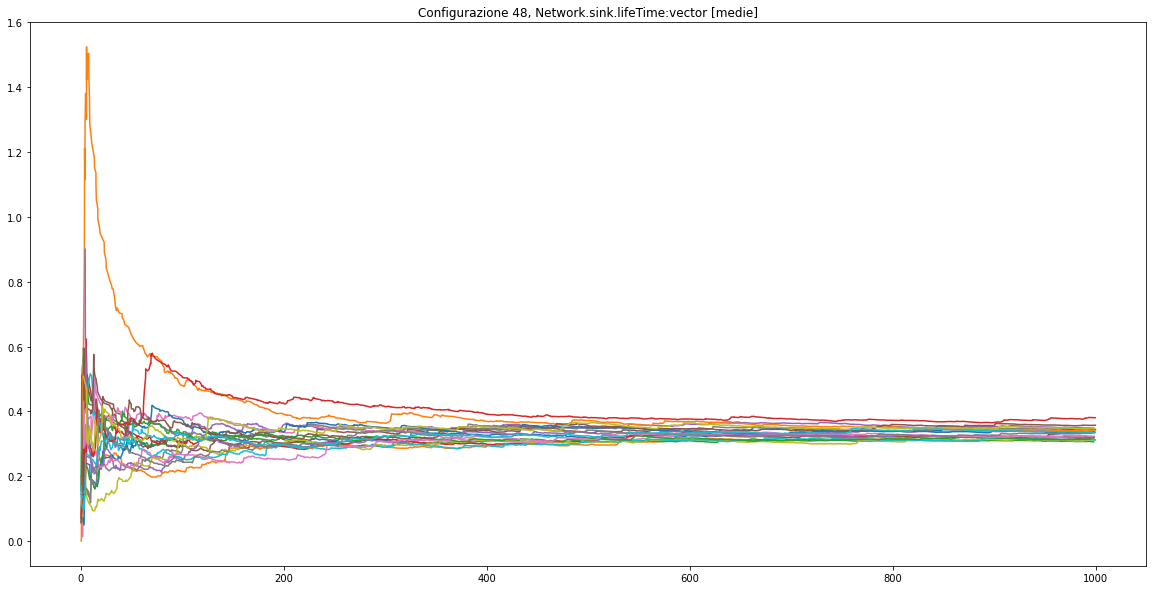

In [28]:
# Grafici per Network.sink.lifeTime:vector [medie]

for i in range(48):
    n = pd.read_csv('csvresults/n{}.csv'.format(i + 1), converters = {'vectime': parse_ndarray, 'vecvalue': parse_ndarray})

    vectors = n[(n['module'] == 'Network.sink') & (n['name'] == 'lifeTime:vector') & (n['type'] == 'vector')]
    
    for v in vectors.itertuples():
        plt.plot(v.vectime, running_avg(v.vecvalue))
    plt.title('Configurazione {}, Network.sink.lifeTime:vector [medie]'.format(i + 1))
    plt.show()

In [ ]:
# Grafici per Network.passiveQueue*.queueLength:vector [medie]

for i in range(48):
    n = pd.read_csv('csvresults/n{}.csv'.format(i + 1), converters = {'vectime': parse_ndarray, 'vecvalue': parse_ndarray})
    
    vectors = n[(n['module'] == 'Network.passiveQueue') & (n['name'] == 'queueLength:vector') & (n['type'] == 'vector')]
    vectors1 = n[(n['module'] == 'Network.passiveQueue1') & (n['name'] == 'queueLength:vector') & (n['type'] == 'vector')]
    vectors2 = n[(n['module'] == 'Network.passiveQueue2') & (n['name'] == 'queueLength:vector') & (n['type'] == 'vector')]
    vectors3 = n[(n['module'] == 'Network.passiveQueue3') & (n['name'] == 'queueLength:vector') & (n['type'] == 'vector')]
    
    for v in vectors.itertuples():
        plt.plot(v.vectime, running_avg(v.vecvalue))
    for v in vectors1.itertuples():
        plt.plot(v.vectime, running_avg(v.vecvalue))
    for v in vectors2.itertuples():
        plt.plot(v.vectime, running_avg(v.vecvalue))
    for v in vectors3.itertuples():
        plt.plot(v.vectime, running_avg(v.vecvalue))
    plt.title('Configurazione {}, Network.passiveQueue*.queueLength:vector [medie]'.format(i + 1))
    plt.show()